In [35]:
#!jupyter nbconvert --to script --no-prompt --TagRemovePreprocessor.remove_cell_tags="['remove_cell']"  EDA.ipynb

In [1]:
import numpy as np
import pandas as pd
#import scipy
#import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy import stats
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
import sklearn.metrics
#import networkx as nx
#import time
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import roc_curve
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import f1_score
#from sklearn.preprocessing import PowerTransformer
#from sklearn.preprocessing import MinMaxScaler
#import matplotlib.pyplot as plt
#from scipy import optimize

In [2]:
import ngram

In [5]:
df_latt_fin = pd.read_csv("/home/jurka/research-project/train/final/lattice_vector.csv")
df_frac_fin = pd.read_csv("/home/jurka/research-project/train/final/atoms_frac_xyz.csv")
df_xyz_fin = pd.read_csv("/home/jurka/research-project/train/final/atoms_xyz.csv")
df_egy_fin = pd.read_csv("/home/jurka/research-project/train/final/energy.csv")
df_gen_fin = pd.read_csv("/home/jurka/research-project/train/relaxation/general.csv")

df_latt1_fin = pd.read_csv("/home/jurka/research-project/test/final/lattice_vector.csv")
df_frac1_fin = pd.read_csv("/home/jurka/research-project/test/final/atoms_frac_xyz.csv")
df_xyz1_fin = pd.read_csv("/home/jurka/research-project/test/final/atoms_xyz.csv")
df_egy1_fin = pd.read_csv("/home/jurka/research-project/test/final/energy.csv")
df_gen1_fin = pd.read_csv("/home/jurka/research-project/test/relaxation/general.csv")

In [3]:
df_latt = pd.read_csv("/home/jurka/research-project/train/relaxation/with_all_zeroes/lattice.csv")
df_frac = pd.read_csv("/home/jurka/research-project/train/relaxation/with_all_zeroes/frac.csv")
df_xyz = pd.read_csv("/home/jurka/research-project/train/relaxation/with_all_zeroes/xyz.csv")
df_egy = pd.read_csv("/home/jurka/research-project/train/relaxation/with_all_zeroes/energy.csv")
df_gen = pd.read_csv("/home/jurka/research-project/train/relaxation/general.csv")
df_force = pd.read_csv("/home/jurka/research-project/train/additional/forces.csv")

In [7]:
df_latt1 = pd.read_csv("/home/jurka/research-project/test/relaxation/with_all_zeroes/lattice.csv")
df_frac1 = pd.read_csv("/home/jurka/research-project/test/relaxation/with_all_zeroes/frac.csv")
df_xyz1 = pd.read_csv("/home/jurka/research-project/test/relaxation/with_all_zeroes/xyz.csv")
df_egy1 = pd.read_csv("/home/jurka/research-project/test/relaxation/with_all_zeroes/energy.csv")
df_gen1 = pd.read_csv("/home/jurka/research-project/test/relaxation/general.csv")
df_force1 = pd.read_csv("/home/jurka/research-project/test/additional/forces.csv")

### Test if the last relaxation numbers are really the same as the final dataset

In [205]:
def compare_long_stuff(df, df_fin): # if not i in ("relaxation_step_number","species")
    x=df[(df["id"]==ajdi) & (df["relaxation_step_number"]==df[df["id"]==ajdi].relaxation_step_number.values[-1])][[i for i in df.columns.values if not i in ("relaxation_step_number", "species")]].values
    y=df_fin[df_fin["id"]==ajdi][[i for i in df.columns.values if not i in ("relaxation_step_number", "species")]].values
    if not (np.abs(x-y)<1e-14).all():
        print(ajdi)

In [206]:
def last_rsn_is_final(df_latt, df_frac, df_xyz, df_egy, df_gen, df_latt_fin, df_frac_fin, df_xyz_fin, df_egy_fin, df_gen_fin):
    for ajdi in df_gen_fin.id.values:
        compare_long_stuff(df_latt, df_latt_fin)
        compare_long_stuff(df_frac, df_frac_fin)
        compare_long_stuff(df_xyz, df_xyz_fin)
        compare_long_stuff(df_egy, df_egy_fin)
    print("Ended.")

In [207]:
last_rsn_is_final(df_latt, df_frac, df_xyz, df_egy, df_gen, df_latt_fin, df_frac_fin, df_xyz_fin, df_egy_fin, df_gen_fin)

Ended.


In [208]:
last_rsn_is_final(df_latt1, df_frac1, df_xyz1, df_egy1, df_gen1, df_latt1_fin, df_frac1_fin, df_xyz1_fin, df_egy1_fin, df_gen1_fin)

Ended.


### Concat. the dataframes to have one big dataset

In [209]:
CONST = 2400

In [6]:
df_latt1["id"] = df_latt1["id"].values + CONST
df_frac1["id"] = df_frac1["id"].values + CONST
df_xyz1["id"] = df_xyz1["id"].values + CONST
df_egy1["id"] = df_egy1["id"].values + CONST
df_gen1["id"] = df_gen1["id"].values + CONST
df_force1["id"] = df_force1["id"].values + CONST

In [7]:
df_latt = pd.concat([df_latt, df_latt1]).reset_index(drop=True)
df_frac = pd.concat([df_frac, df_frac1]).reset_index(drop=True)
df_xyz = pd.concat([df_xyz, df_xyz1]).reset_index(drop=True)
df_egy = pd.concat([df_egy, df_egy1]).reset_index(drop=True)
df_gen = pd.concat([df_gen, df_gen1]).reset_index(drop=True)
df_force = pd.concat([df_force, df_force1]).reset_index(drop=True)

In [8]:
ajdis = df_gen["id"].values
indexing = df_latt[df_latt.columns[:2]]

In [134]:
df_latt

,id,relaxation_step_number,lattice_vector_1_x,lattice_vector_1_y,lattice_vector_1_z,lattice_vector_2_x,lattice_vector_2_y,lattice_vector_2_z,lattice_vector_3_x,lattice_vector_3_y,lattice_vector_3_z
0,1,0,9.948758,-0.023988,-0.012877,0.020066,8.567744,-0.038975,0.014275,-0.000454,9.176459
1,2,0,6.238403,0.016947,-0.010515,-3.135384,5.396237,0.016790,0.040246,-0.048064,23.532612
2,2,1,6.211404,0.012048,-0.004714,-3.122471,5.374716,0.013662,0.049339,-0.048739,23.578503
3,2,2,6.194021,-0.004324,-0.000077,-3.134810,5.355264,0.008039,0.062361,-0.044105,23.662913
4,2,3,6.200970,0.002719,-0.005367,-3.131943,5.360881,0.010332,0.054188,-0.045885,23.619045
...,...,...,...,...,...,...,...,...,...,...,...
37205,3000,10,9.489335,0.160476,-0.087090,-0.025589,9.501558,0.073806,0.165813,0.052979,9.536774
37206,3000,11,9.489150,0.160109,-0.087098,-0.025798,9.500881,0.073744,0.165786,0.053284,9.537347
37207,3000,12,9.489058,0.159908,-0.087290,-0.025770,9.500624,0.073636,0.165539,0.053530,9.537885
37208,3000,13,9.488954,0.159876,-0.087279,-0.025568,9.500566,0.073624,0.165597,0.053275,9.538074


In [135]:
df_frac

,id,relaxation_step_number,species,L1,L2,L3
0,1,0,Ga,0.161225,0.846772,0.693017
1,1,0,Al,0.663710,0.847596,0.695078
2,1,0,Al,0.339848,0.151440,0.193321
3,1,0,Ga,0.834528,0.154660,0.196096
4,1,0,Ga,0.090465,0.349773,0.193898
...,...,...,...,...,...,...
2376475,3000,14,O,0.666836,0.887251,0.894294
2376476,3000,14,O,0.123331,0.843541,0.869818
2376477,3000,14,O,0.613984,0.658138,0.092213
2376478,3000,14,O,0.897525,0.346958,0.636122


In [136]:
df_xyz

,id,relaxation_step_number,species,x [A],y [A],z [A]
0,1,0,Ga,1.630872,7.250740,6.324361
1,1,0,Al,6.630021,7.245745,6.336774
2,1,0,Al,3.386863,1.289255,1.763723
3,1,0,Ga,8.308420,1.304978,1.782694
4,1,0,Ga,0.909800,2.994510,1.764503
...,...,...,...,...,...,...
2376475,3000,14,O,6.452977,8.583567,8.536763
2376476,3000,14,O,1.292775,8.080034,8.347711
2376477,3000,14,O,5.824497,6.355746,0.874153
2376478,3000,14,O,8.613009,3.473720,6.014339


In [137]:
df_egy

,id,relaxation_step_number,formation_energy_ev_natom,bandgap_energy_ev
0,1,0,0.067960,3.438673
1,2,0,0.251907,2.837926
2,2,1,0.250085,2.889246
3,2,2,0.251390,2.947492
4,2,3,0.250065,2.941308
...,...,...,...,...
37205,3000,10,0.206601,2.137313
37206,3000,11,0.206598,2.137614
37207,3000,12,0.206596,2.137015
37208,3000,13,0.206595,2.137538


In [138]:
df_gen

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in
0,1,33,80,0.6250,0.37500,0.00000
1,2,194,80,0.6250,0.37500,0.00000
2,3,227,40,0.8125,0.18750,0.00000
3,4,167,30,0.7500,0.00000,0.25000
4,5,194,80,0.0000,0.62500,0.37500
...,...,...,...,...,...,...
2986,2996,12,80,0.0000,0.59375,0.40625
2987,2997,33,40,0.1250,0.00000,0.87500
2988,2998,194,80,0.0000,0.25000,0.75000
2989,2999,33,40,0.6250,0.00000,0.37500


(0, 100)

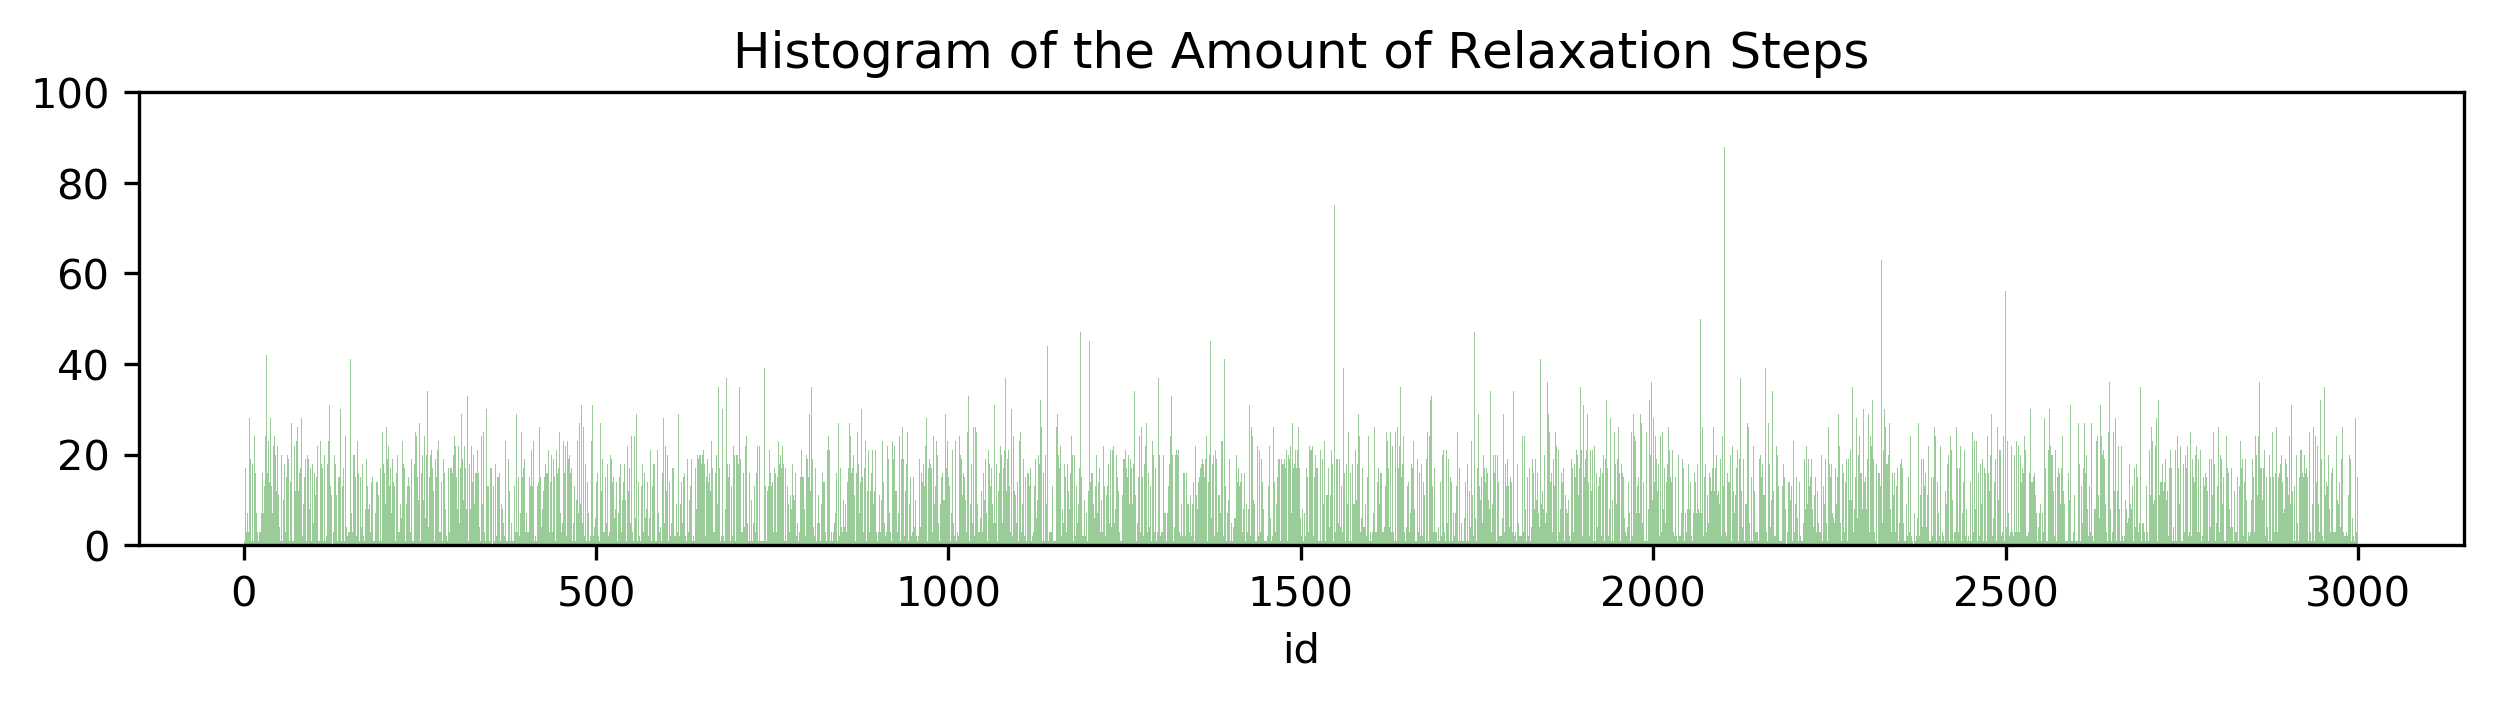

In [139]:
ids = len(df_gen["id"])
fig = plt.figure(num=None, figsize=(10, 2), dpi=300, facecolor='w', edgecolor='k')
sns.distplot(df_latt["id"], color="green", norm_hist=False, hist=True, bins=ids+9, axlabel="id", kde=False)
plt.title("Histogram of the Amount of Relaxation Steps")
plt.ylim(0,100)

The histogram indicates that the amount of relaxation steps for each material rarely exceeds 30 steps.

In [140]:
def cetnosti(df_gen,n,the_thing):
    """Spocti cetnosti dane veci the_thing

    Keyword arguments:
    df_gen -- dataframe general informaci
    n -- pocet pres ktery hledat
    the_thing -- nazev sloupce veci, pro kterou chceme cetnost
    """
    dic = {}
    for j in range(1,n+1):
        dic[str(j)] = 0
    for i in df_gen["id"].to_list():
        for j in range(1,n+1):
            if df_gen.loc[df_gen["id"] == i][the_thing].to_list()[0] == j:
                dic[str(j)] += 1
    keys = dic.keys()
    count = []
    for i in keys:
        if dic[i] != 0:
            count.append(i,dic[i])
    return count

In [141]:
spacegroup_cetnosti = cetnosti(df_gen,230,"spacegroup")

In [201]:
for tupl in spacegroup_cetnosti:
    spacegroup_cetnosti[spacegroup_cetnosti.index(tupl)] = (int(tupl[0]), tupl[1])

In [204]:
spacegroup_cetnosti.sort(key=lambda x:x[0])
spacegroup_cetnosti

[(12, 452), (33, 539), (167, 461), (194, 443), (206, 612), (227, 484)]

Text(0, 0.5, 'count')

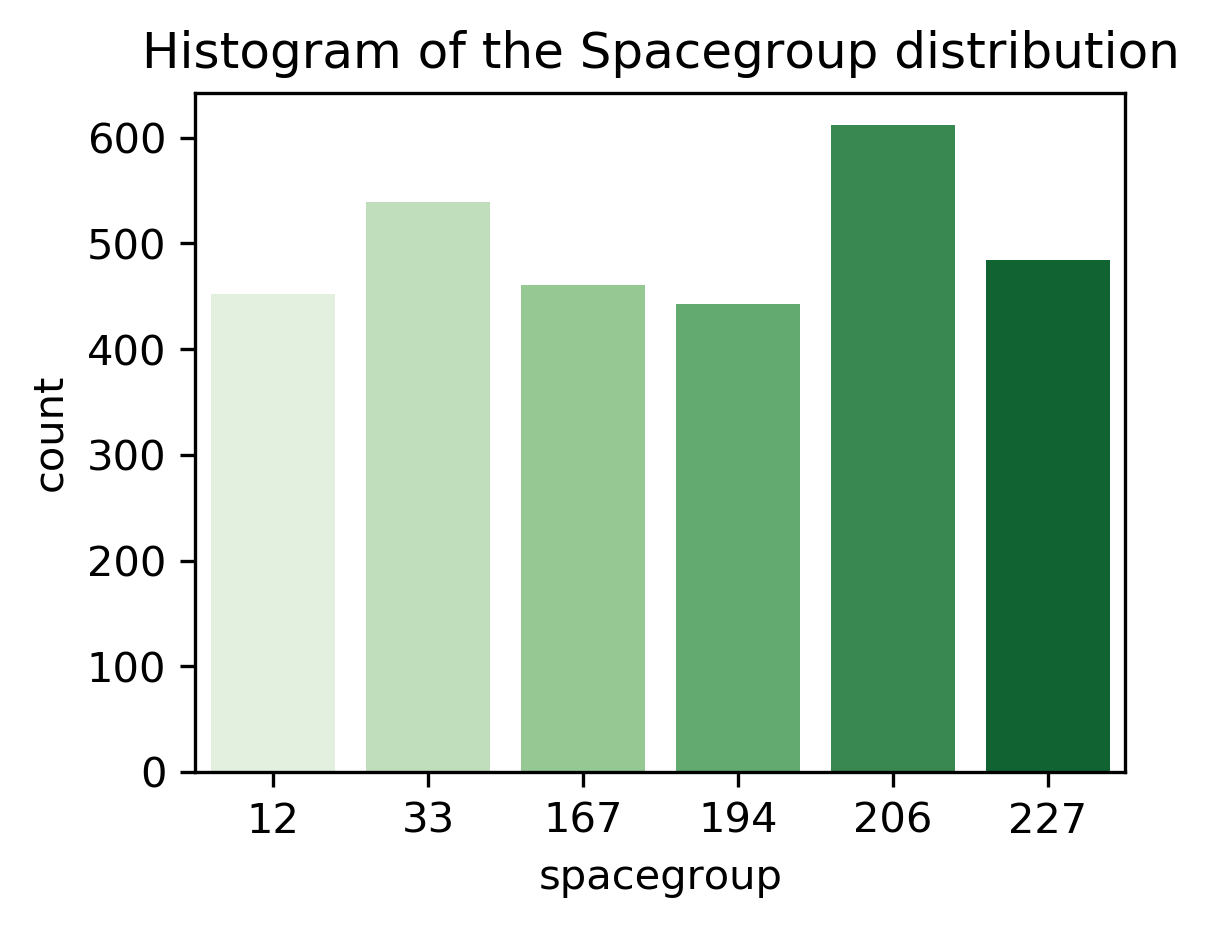

In [205]:
# [12,33,167,194,206,227]
fig = plt.figure(num=None, figsize=(4, 3), dpi=300, facecolor='w', edgecolor='k')
sns.barplot(y=np.array([i[1] for i in spacegroup_cetnosti]),x=np.array([i[0] for i in spacegroup_cetnosti]),palette="Greens")
plt.title("Histogram of the Spacegroup distribution")
plt.xlabel("spacegroup")
plt.ylabel("count")

In [143]:
number_of_atoms_cetnosti = cetnosti(df_gen,80,"number_of_total_atoms")

In [144]:
print("Checksum:", sum([i[1] for i in number_of_atoms_cetnosti]))

Checksum: 2991


Text(0.5, 0, 'number of atoms')

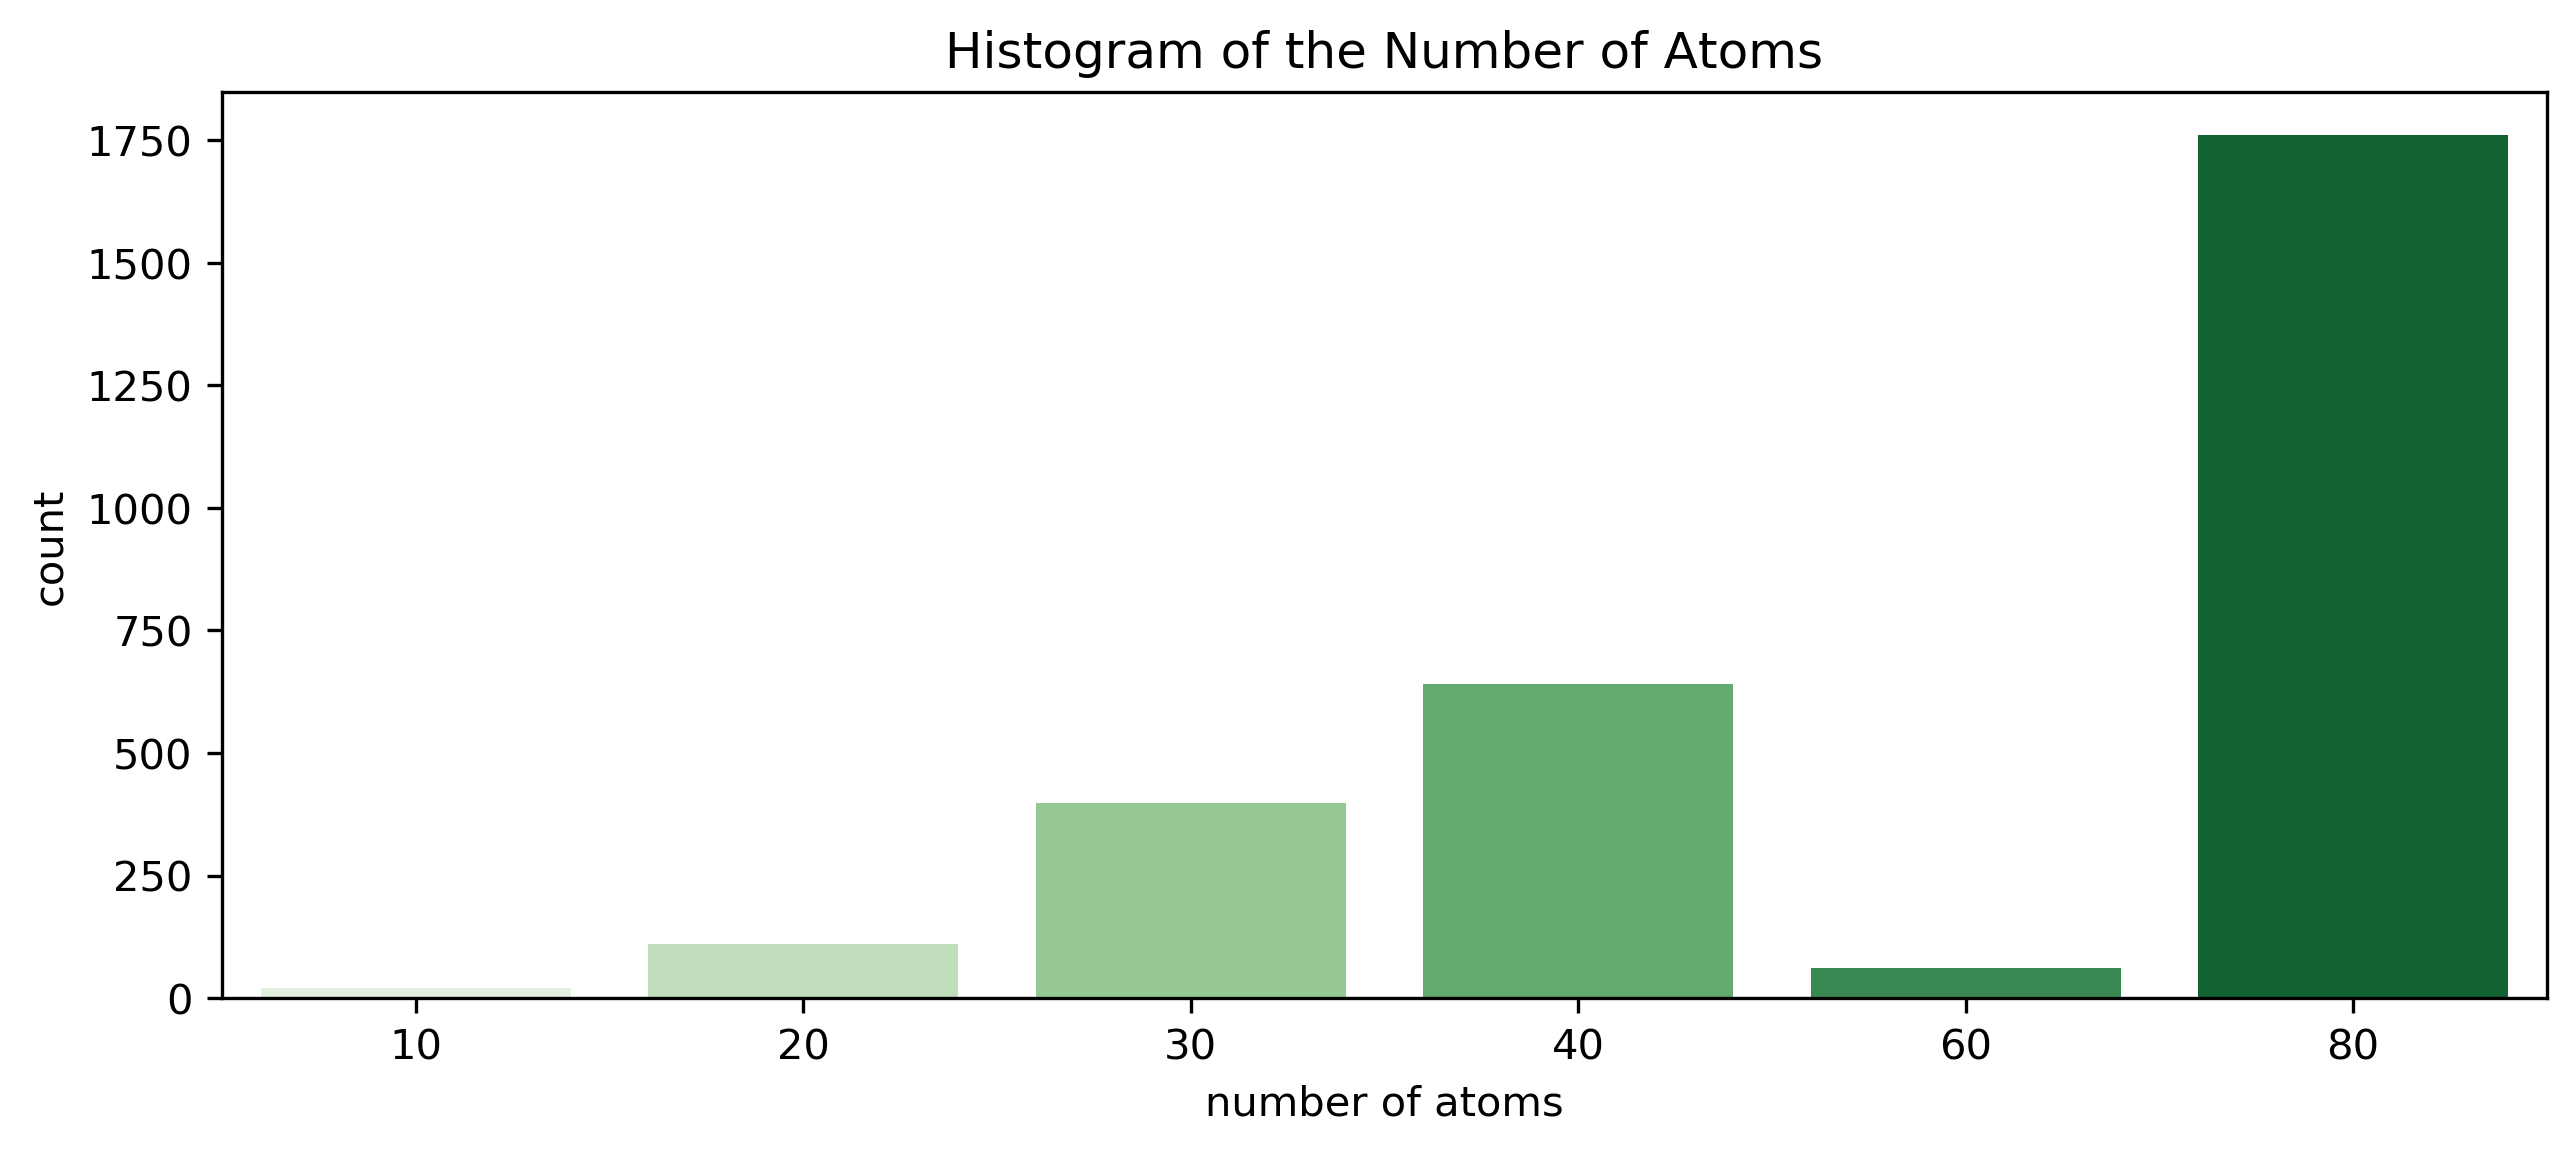

In [145]:
fig = plt.figure(num=None, figsize=(10, 4), dpi=300, facecolor='w', edgecolor='k')
sns.barplot(y=np.array([i[1] for i in number_of_atoms_cetnosti]), x=np.array([i[0] for i in number_of_atoms_cetnosti]),palette="Greens")
plt.title("Histogram of the Number of Atoms")
plt.ylabel("count")
plt.xlabel("number of atoms")

# Histograms - energies

(-0.1, 1)

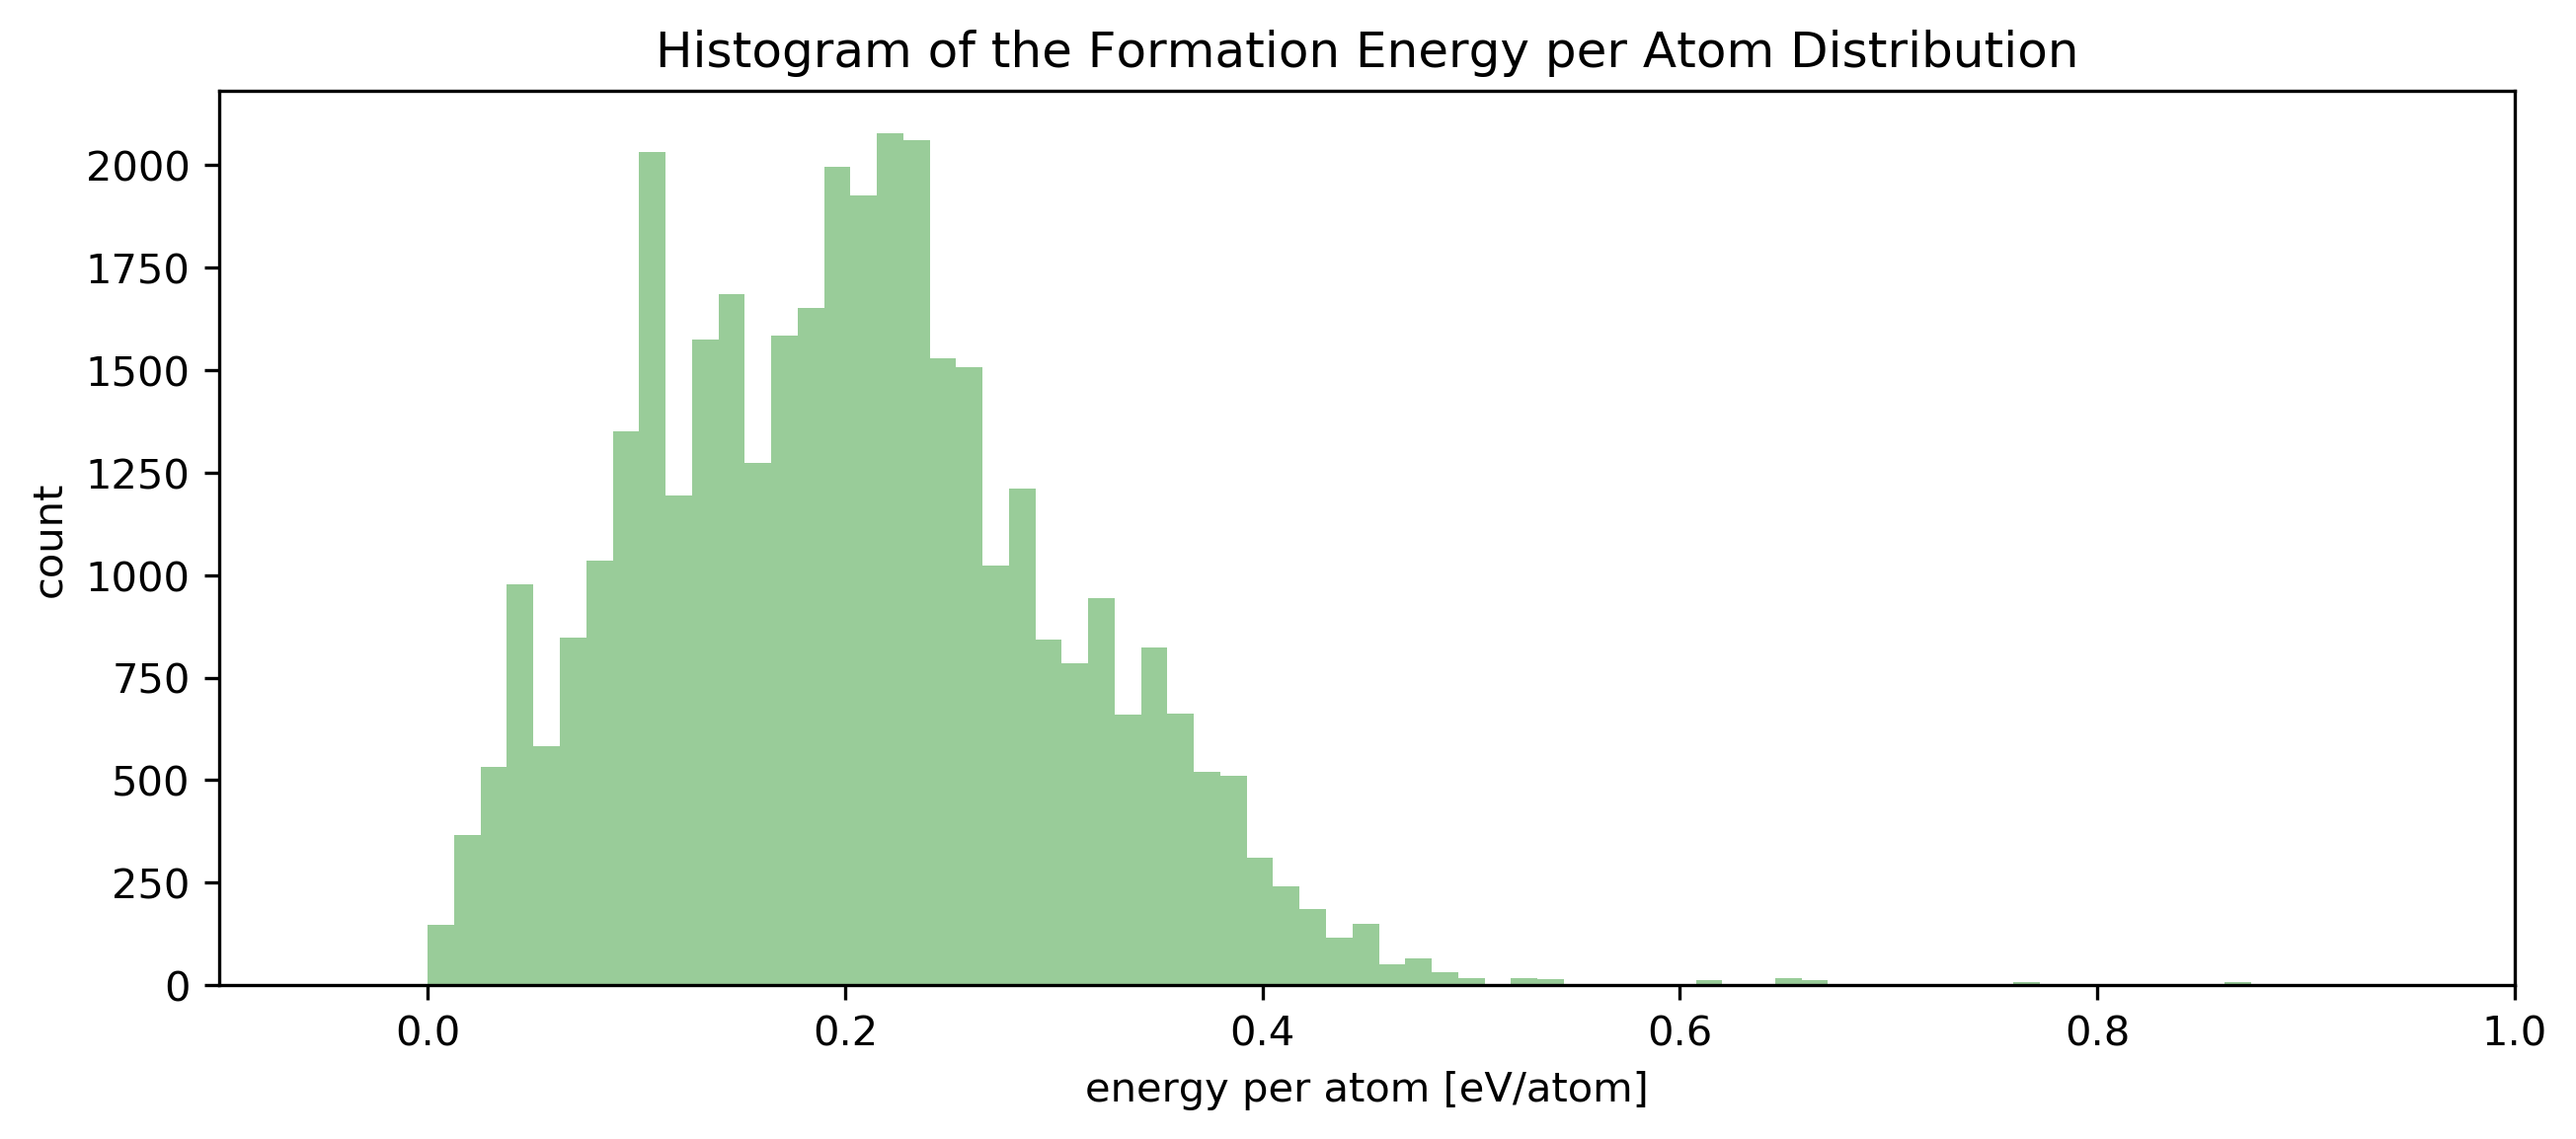

In [331]:
fig = plt.figure(num=None, figsize=(10, 4), dpi=300, facecolor='w', edgecolor='k')
sns.distplot(df_egy.formation_energy_ev_natom, color="green", norm_hist=False, hist=True, bins=300, axlabel="energy per atom [eV/atom]", kde=False)
plt.ylabel("count")
plt.title("Histogram of the Formation Energy per Atom Distribution")
plt.xlim(-0.1,1)

Text(0.5, 1.0, 'Histogram of the Bandgap Energy Distribution')

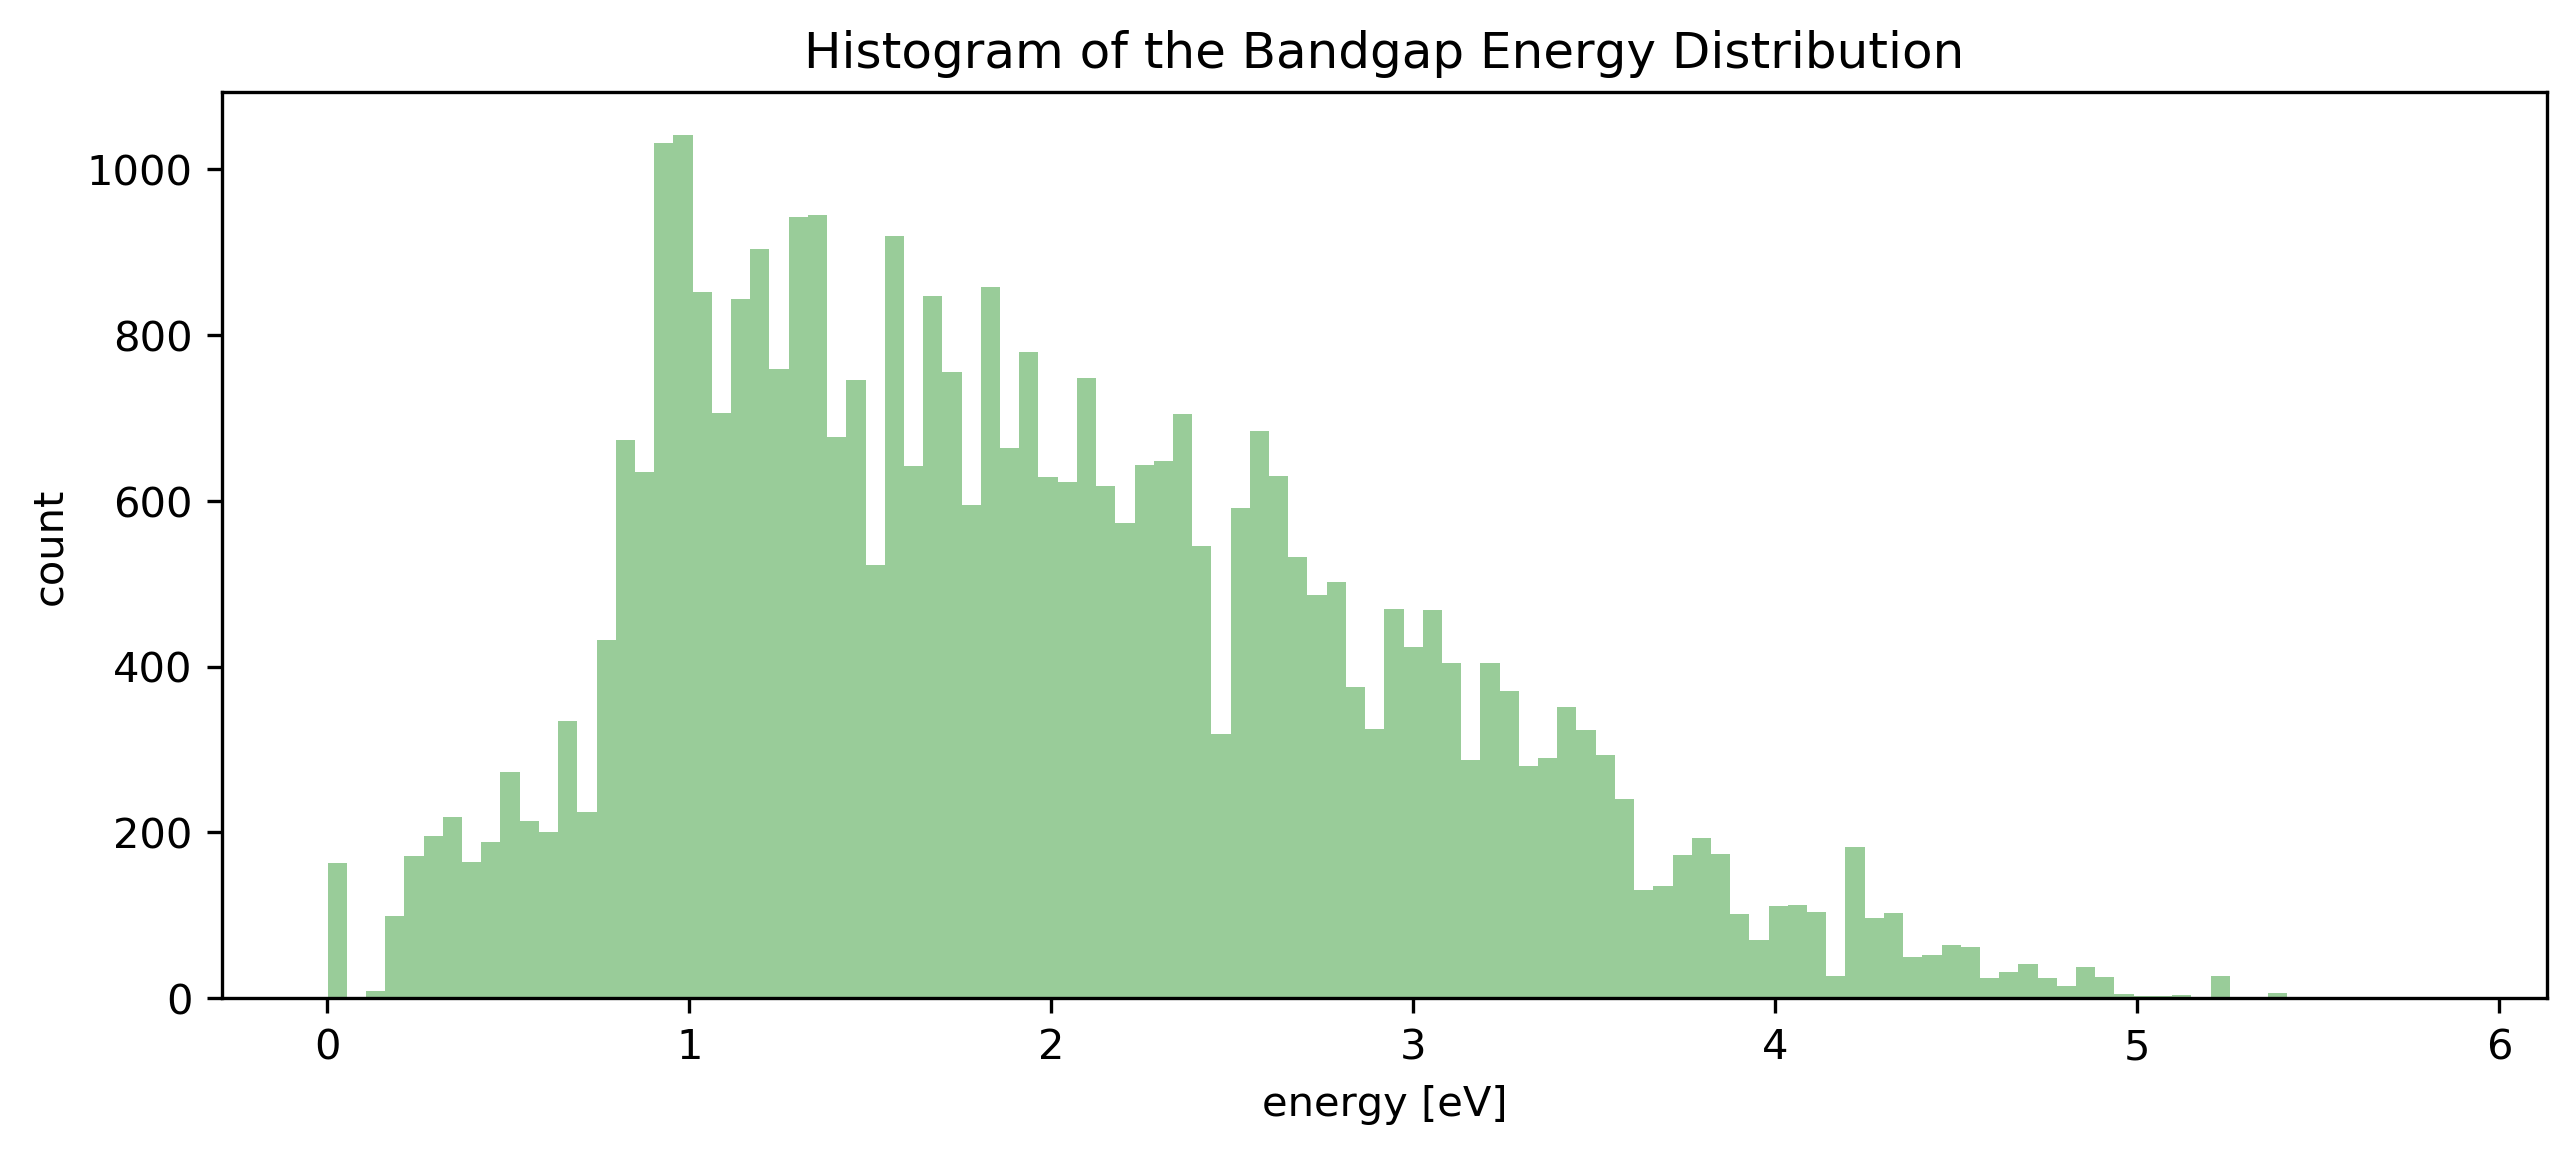

In [332]:
fig = plt.figure(num=None, figsize=(10, 4), dpi=300, facecolor='w', edgecolor='k')
sns.distplot(df_egy.bandgap_energy_ev, color="green", norm_hist=False, hist=True, bins=110, axlabel="energy [eV]", kde=False)
plt.ylabel("count")
plt.title("Histogram of the Bandgap Energy Distribution")

In [148]:
#histograms of atomic position 

In [ ]:
material.lattice.get_wigner_seitz_cell()

In [9]:
volume = []
angles = []
lengths = []
density = []
particle_density = []
for ajdi in ajdis:
    for rsn in indexing[indexing["id"]==ajdi].relaxation_step_number.values:
        material = ngram.init_material(df_frac, df_latt, ajdi, rsn)
        volume.append(material.lattice.volume)
        particle_density.append(df_gen["number_of_total_atoms"][df_gen["id"]==ajdi].values[0]/material.lattice.volume)
        angles.append(material.lattice.angles)
        lengths.append(material.lattice.lengths)
        density.append(material.density)

# Histogram - Unit Cell Volume

Text(0.5, 1.0, 'Histogram of the Unit Cell Volume Distribution')

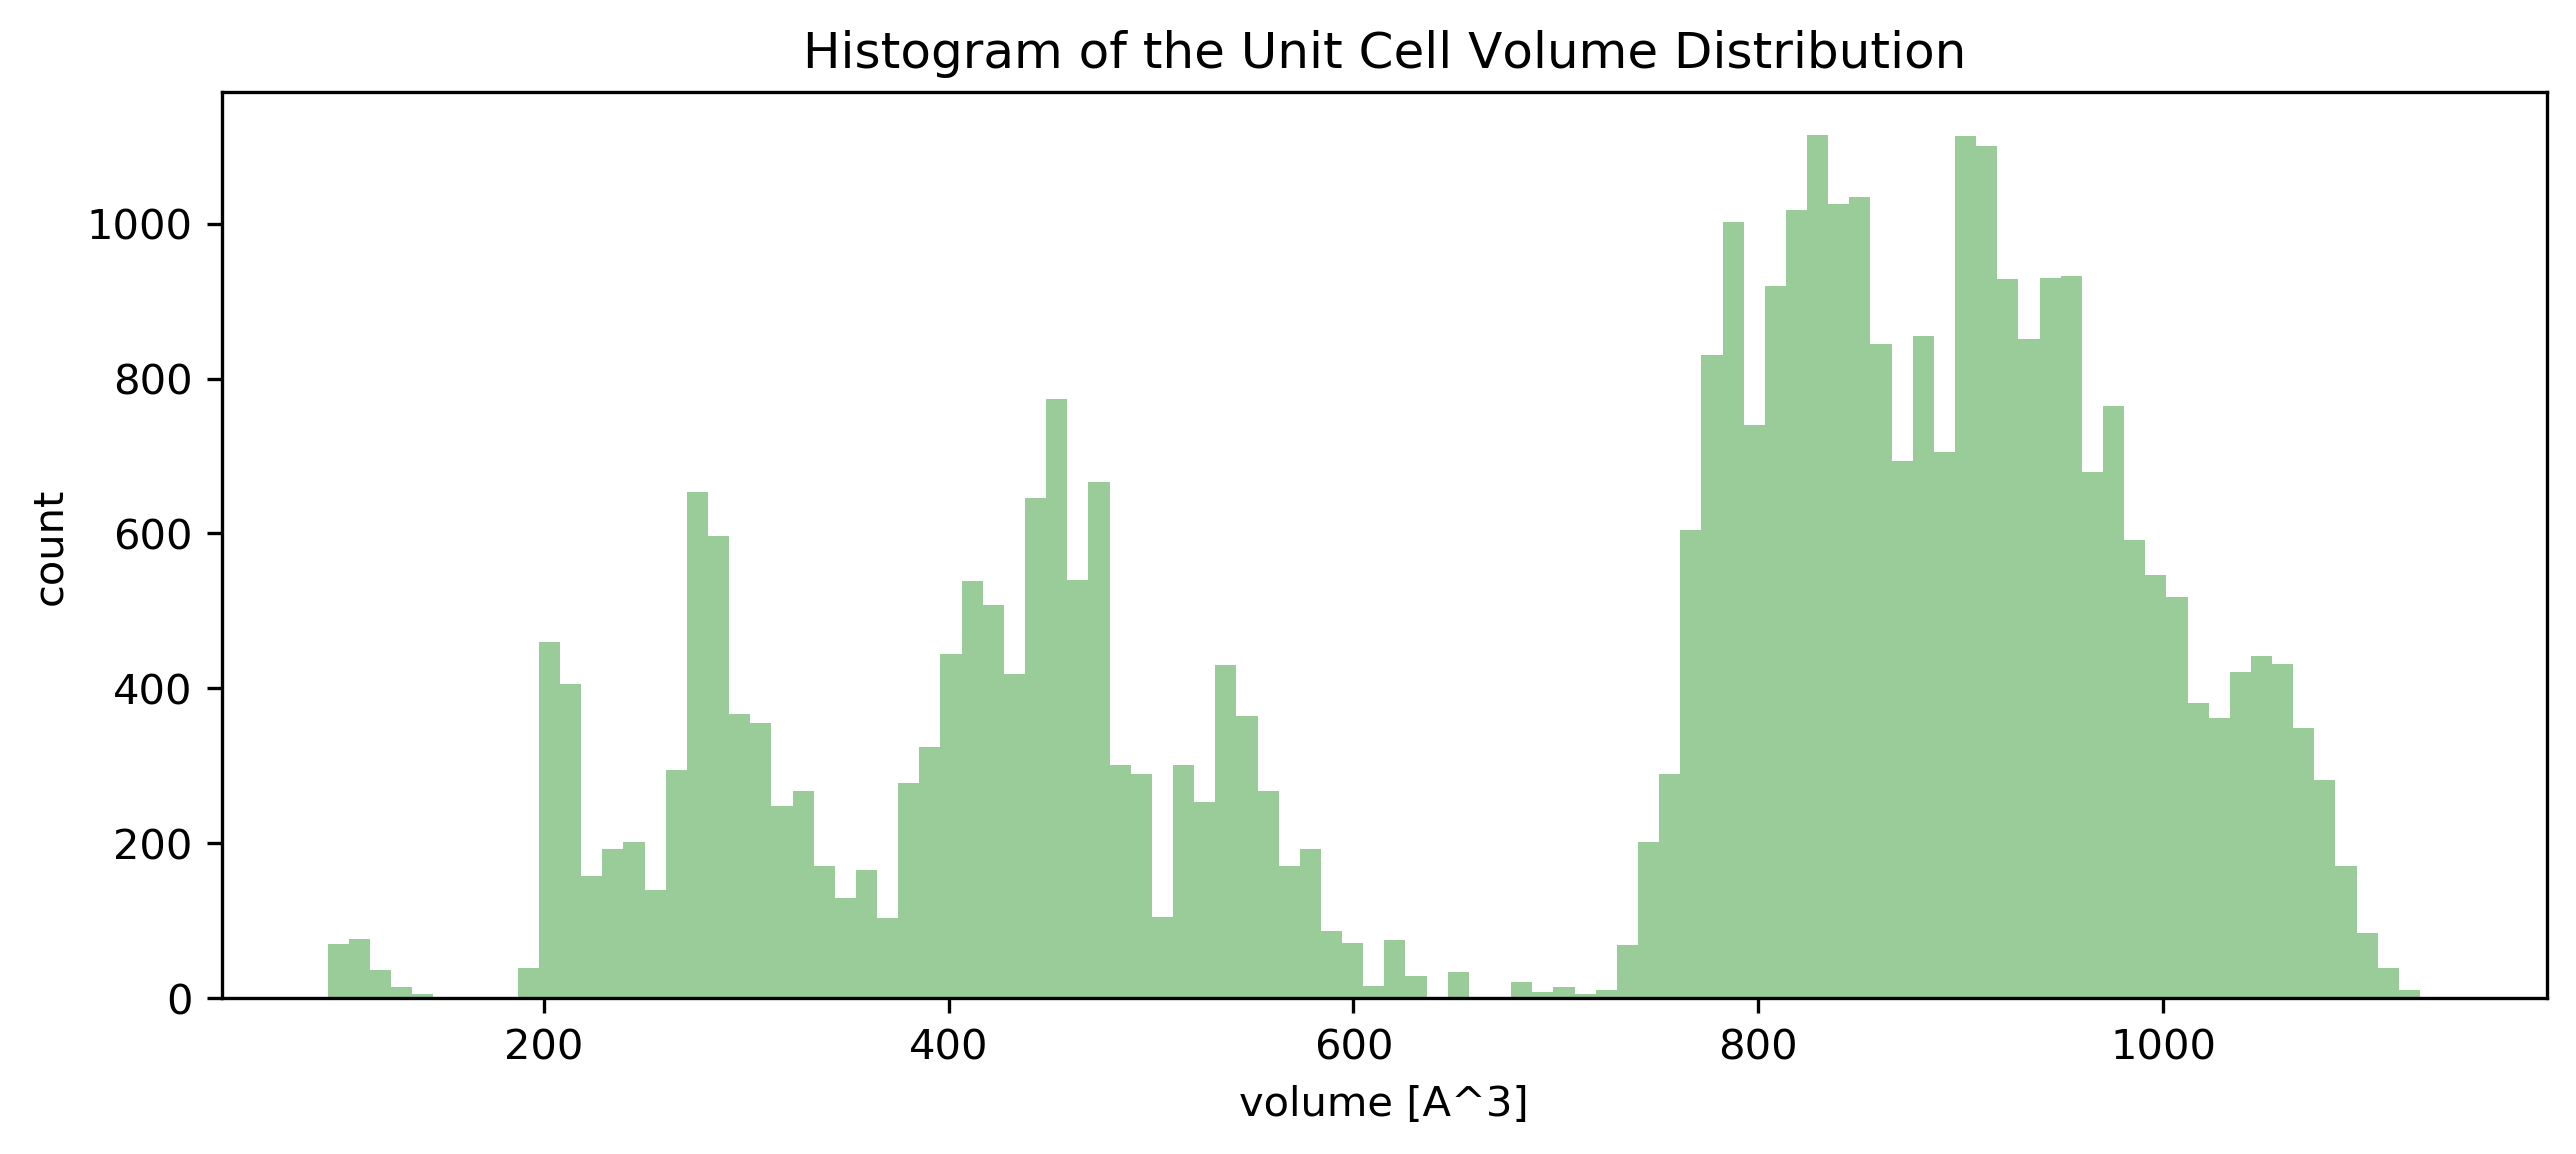

In [260]:
fig = plt.figure(num=None, figsize=(10, 4), dpi=300, facecolor='w', edgecolor='k')
sns.distplot(volume, color="green", norm_hist=False, hist=True, bins=100, axlabel="volume [A^3]", kde=False)
plt.ylabel("count")
plt.title("Histogram of the Unit Cell Volume Distribution")

# Histogram - Density (mass)

Text(0.5, 1.0, 'Histogram of the Unit Cell Density Distribution')

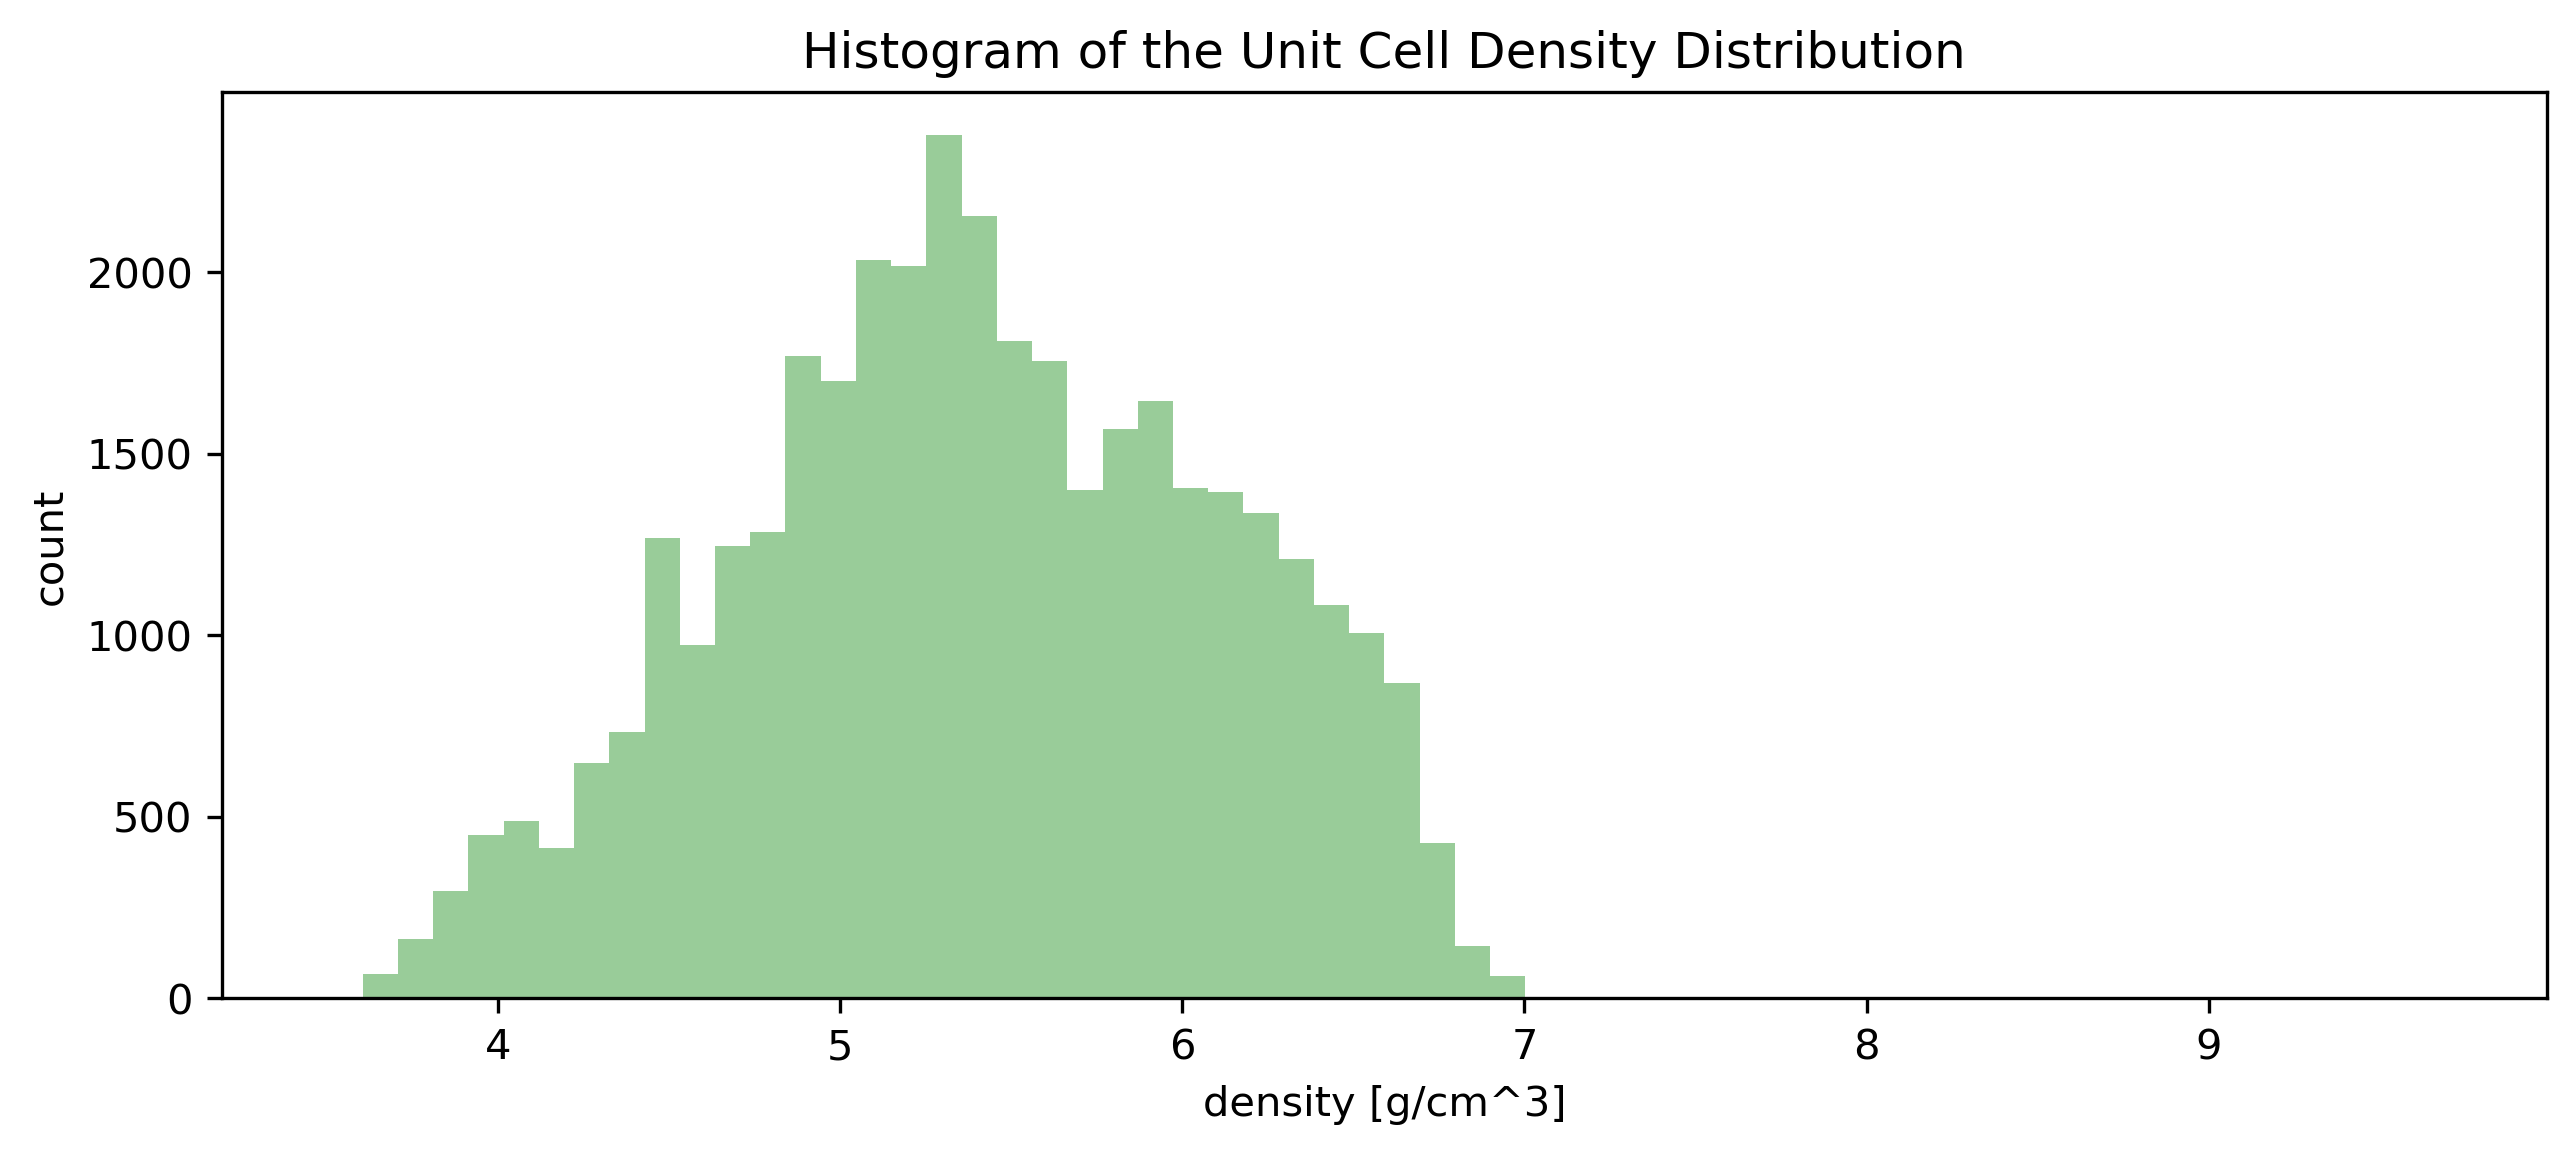

In [31]:
fig = plt.figure(num=None, figsize=(10, 4), dpi=300, facecolor='w', edgecolor='k')
sns.distplot(density, color="green", norm_hist=False, hist=True, bins=60, axlabel="density [g/cm^3]", kde=False)
plt.ylabel("count")
plt.title("Histogram of the Unit Cell Density Distribution")

# Histogram - Density (number of particles)

Text(0.5, 1.0, 'Histogram of the Unit Cell Atom Density Distribution')

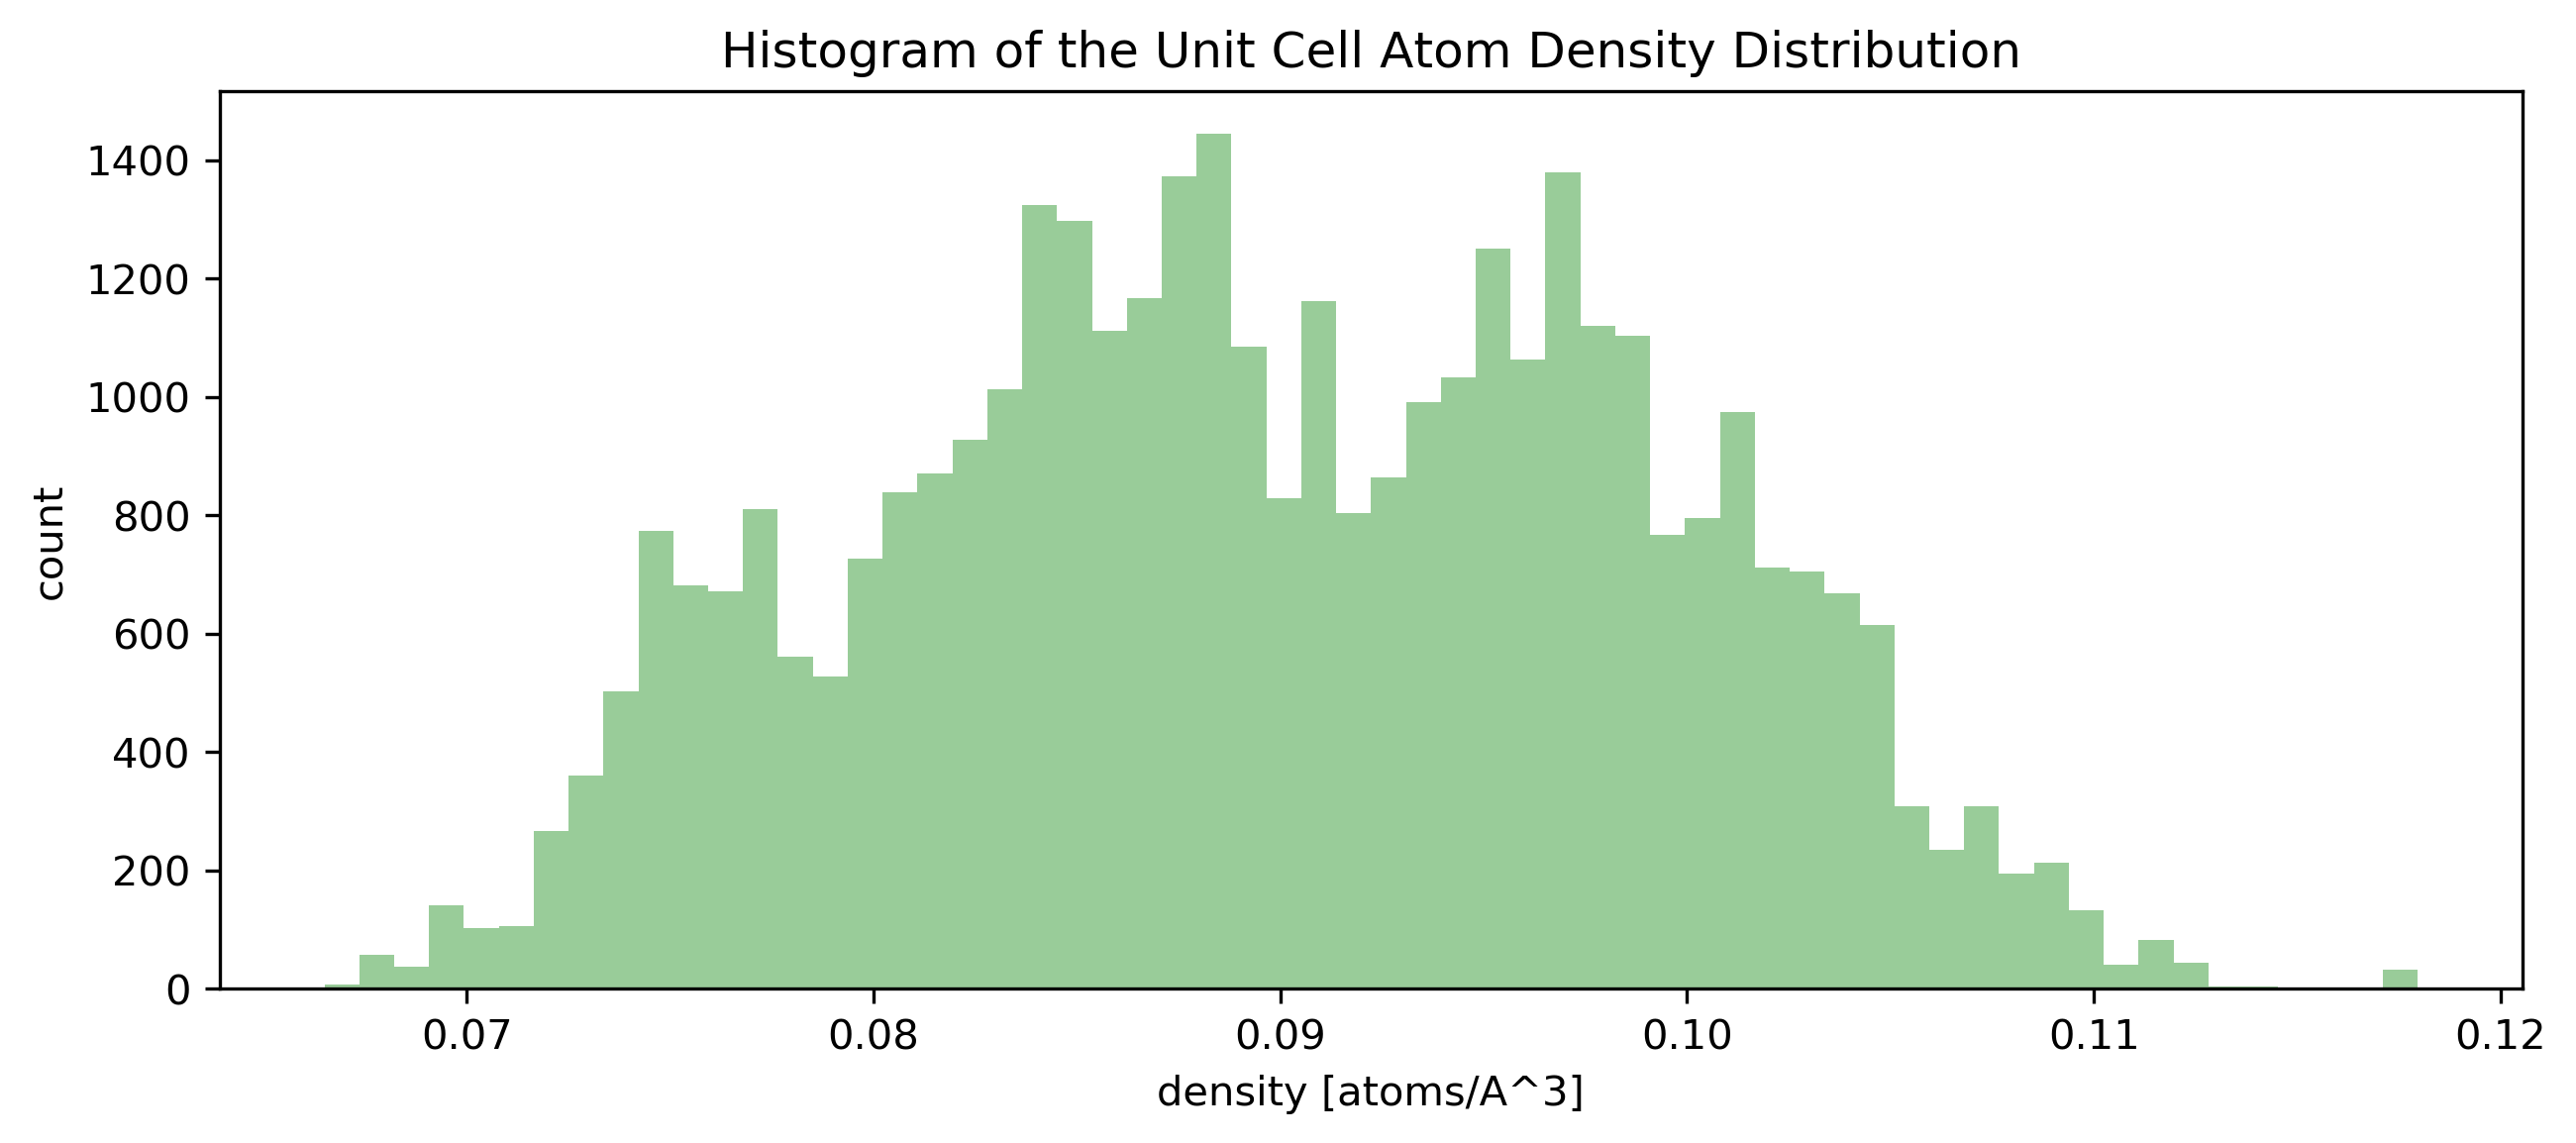

In [32]:
fig = plt.figure(num=None, figsize=(10, 4), dpi=300, facecolor='w', edgecolor='k')
sns.distplot(particle_density, color="green", norm_hist=False, hist=True, bins=60, axlabel="density [atoms/A^3]", kde=False)
plt.ylabel("count")
plt.title("Histogram of the Unit Cell Atom Density Distribution")

# Histograms - Angles

Text(0.5, 1.0, 'Histogram of the Alpha Angle Distribution')

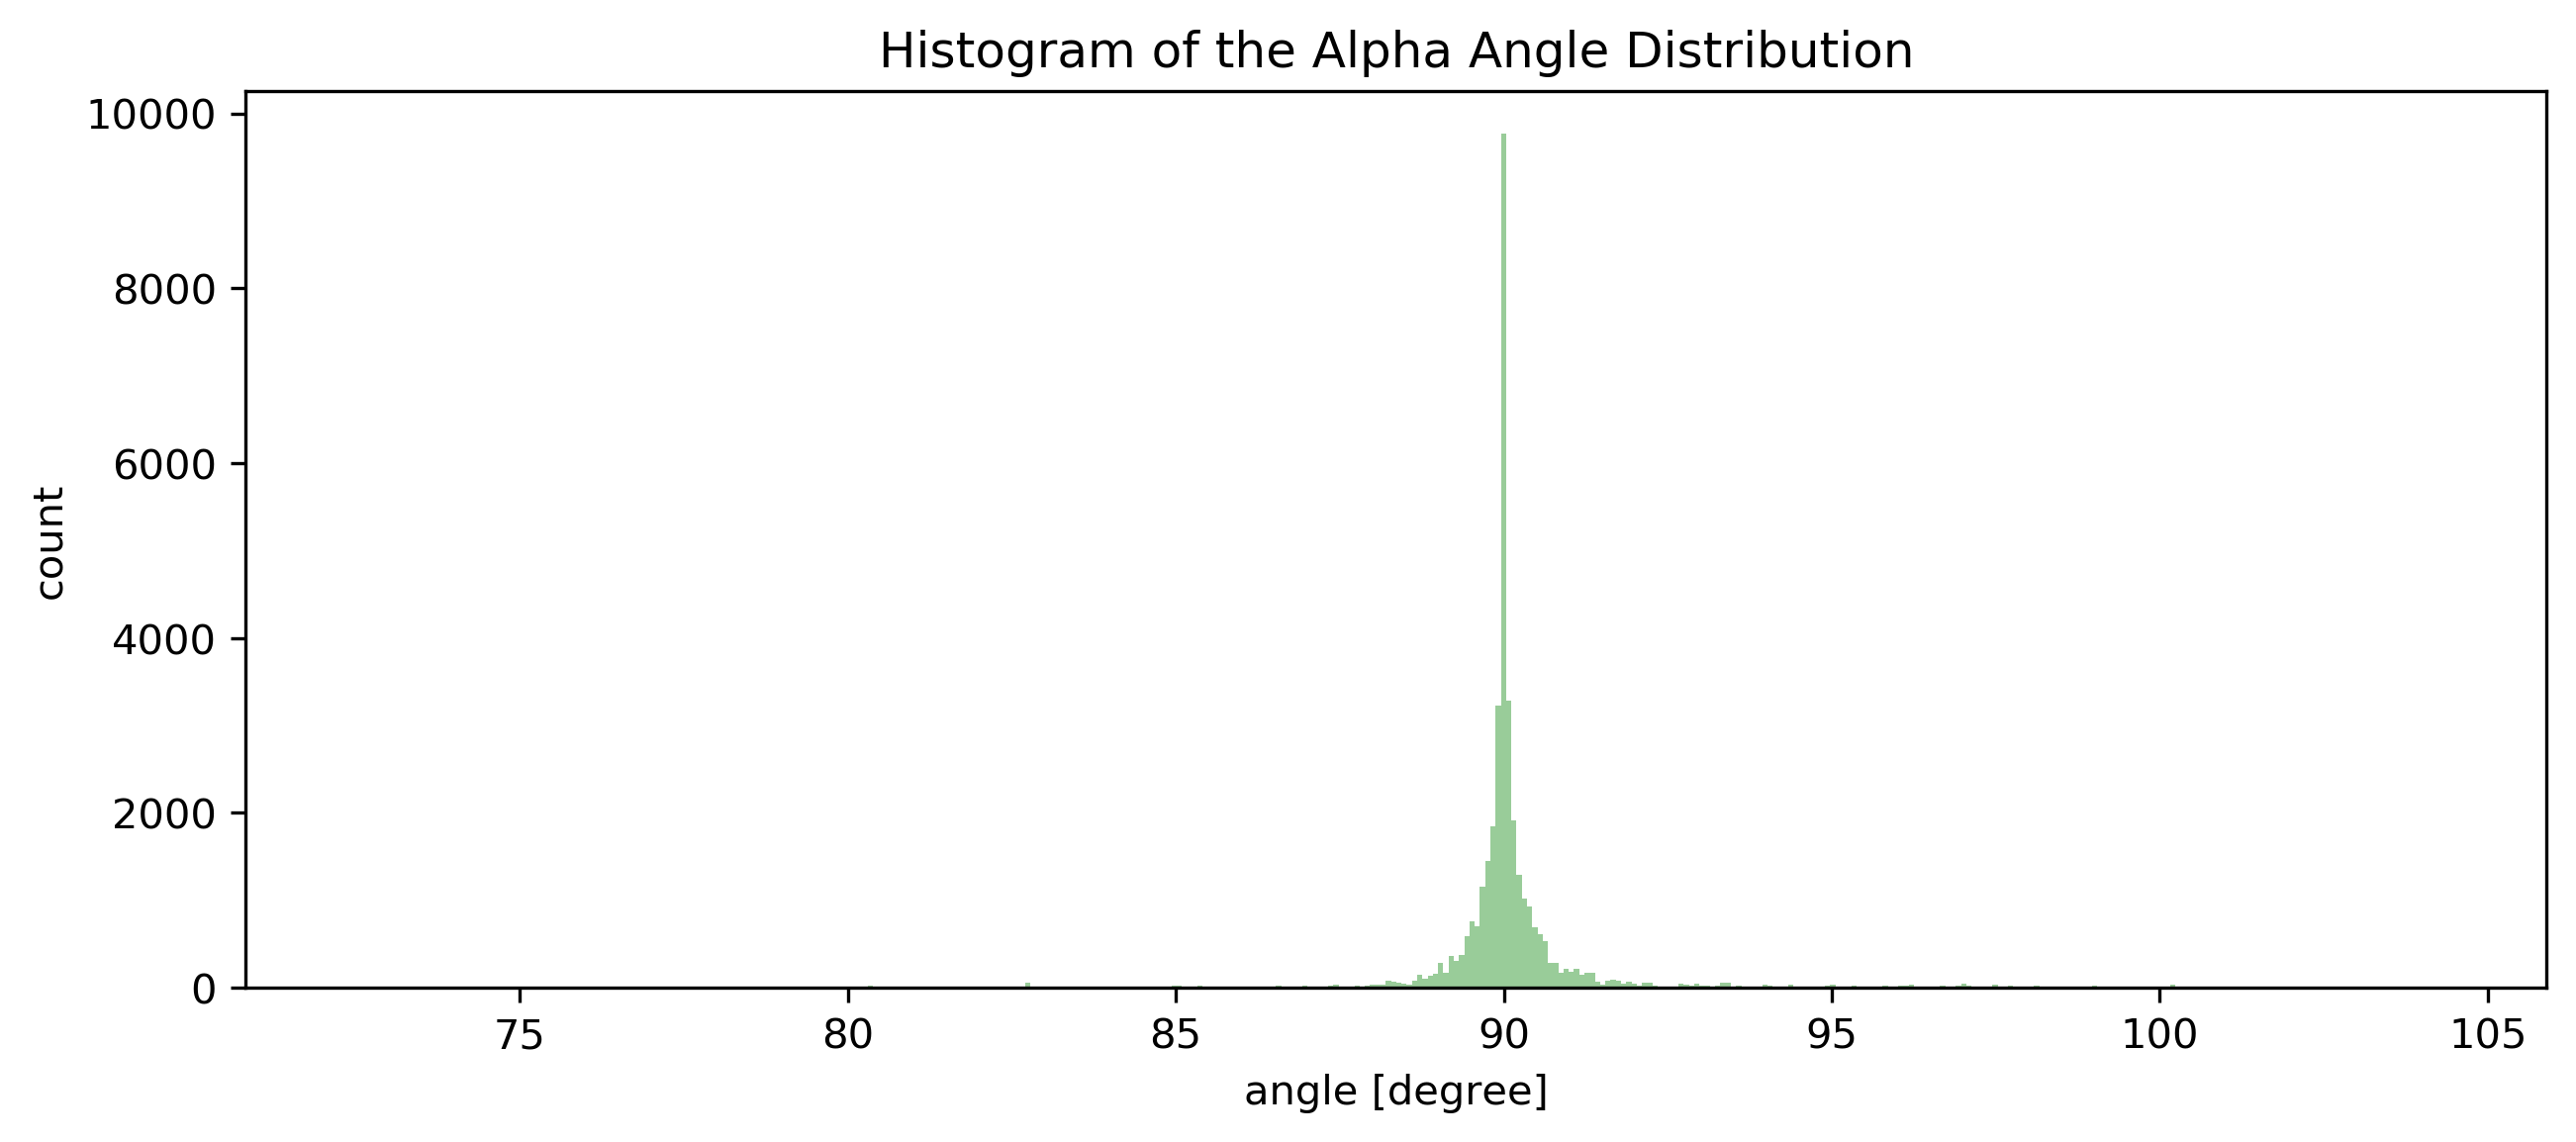

In [262]:
fig = plt.figure(num=None, figsize=(10, 4), dpi=300, facecolor='w', edgecolor='k')
sns.distplot([i[0] for i in angles], color="green", norm_hist=False, hist=True, bins=400, axlabel="angle [degree]", kde=False)
plt.ylabel("count")
plt.title("Histogram of the Alpha Angle Distribution")

Text(0.5, 1.0, 'Histogram of the Beta Angle Distribution')

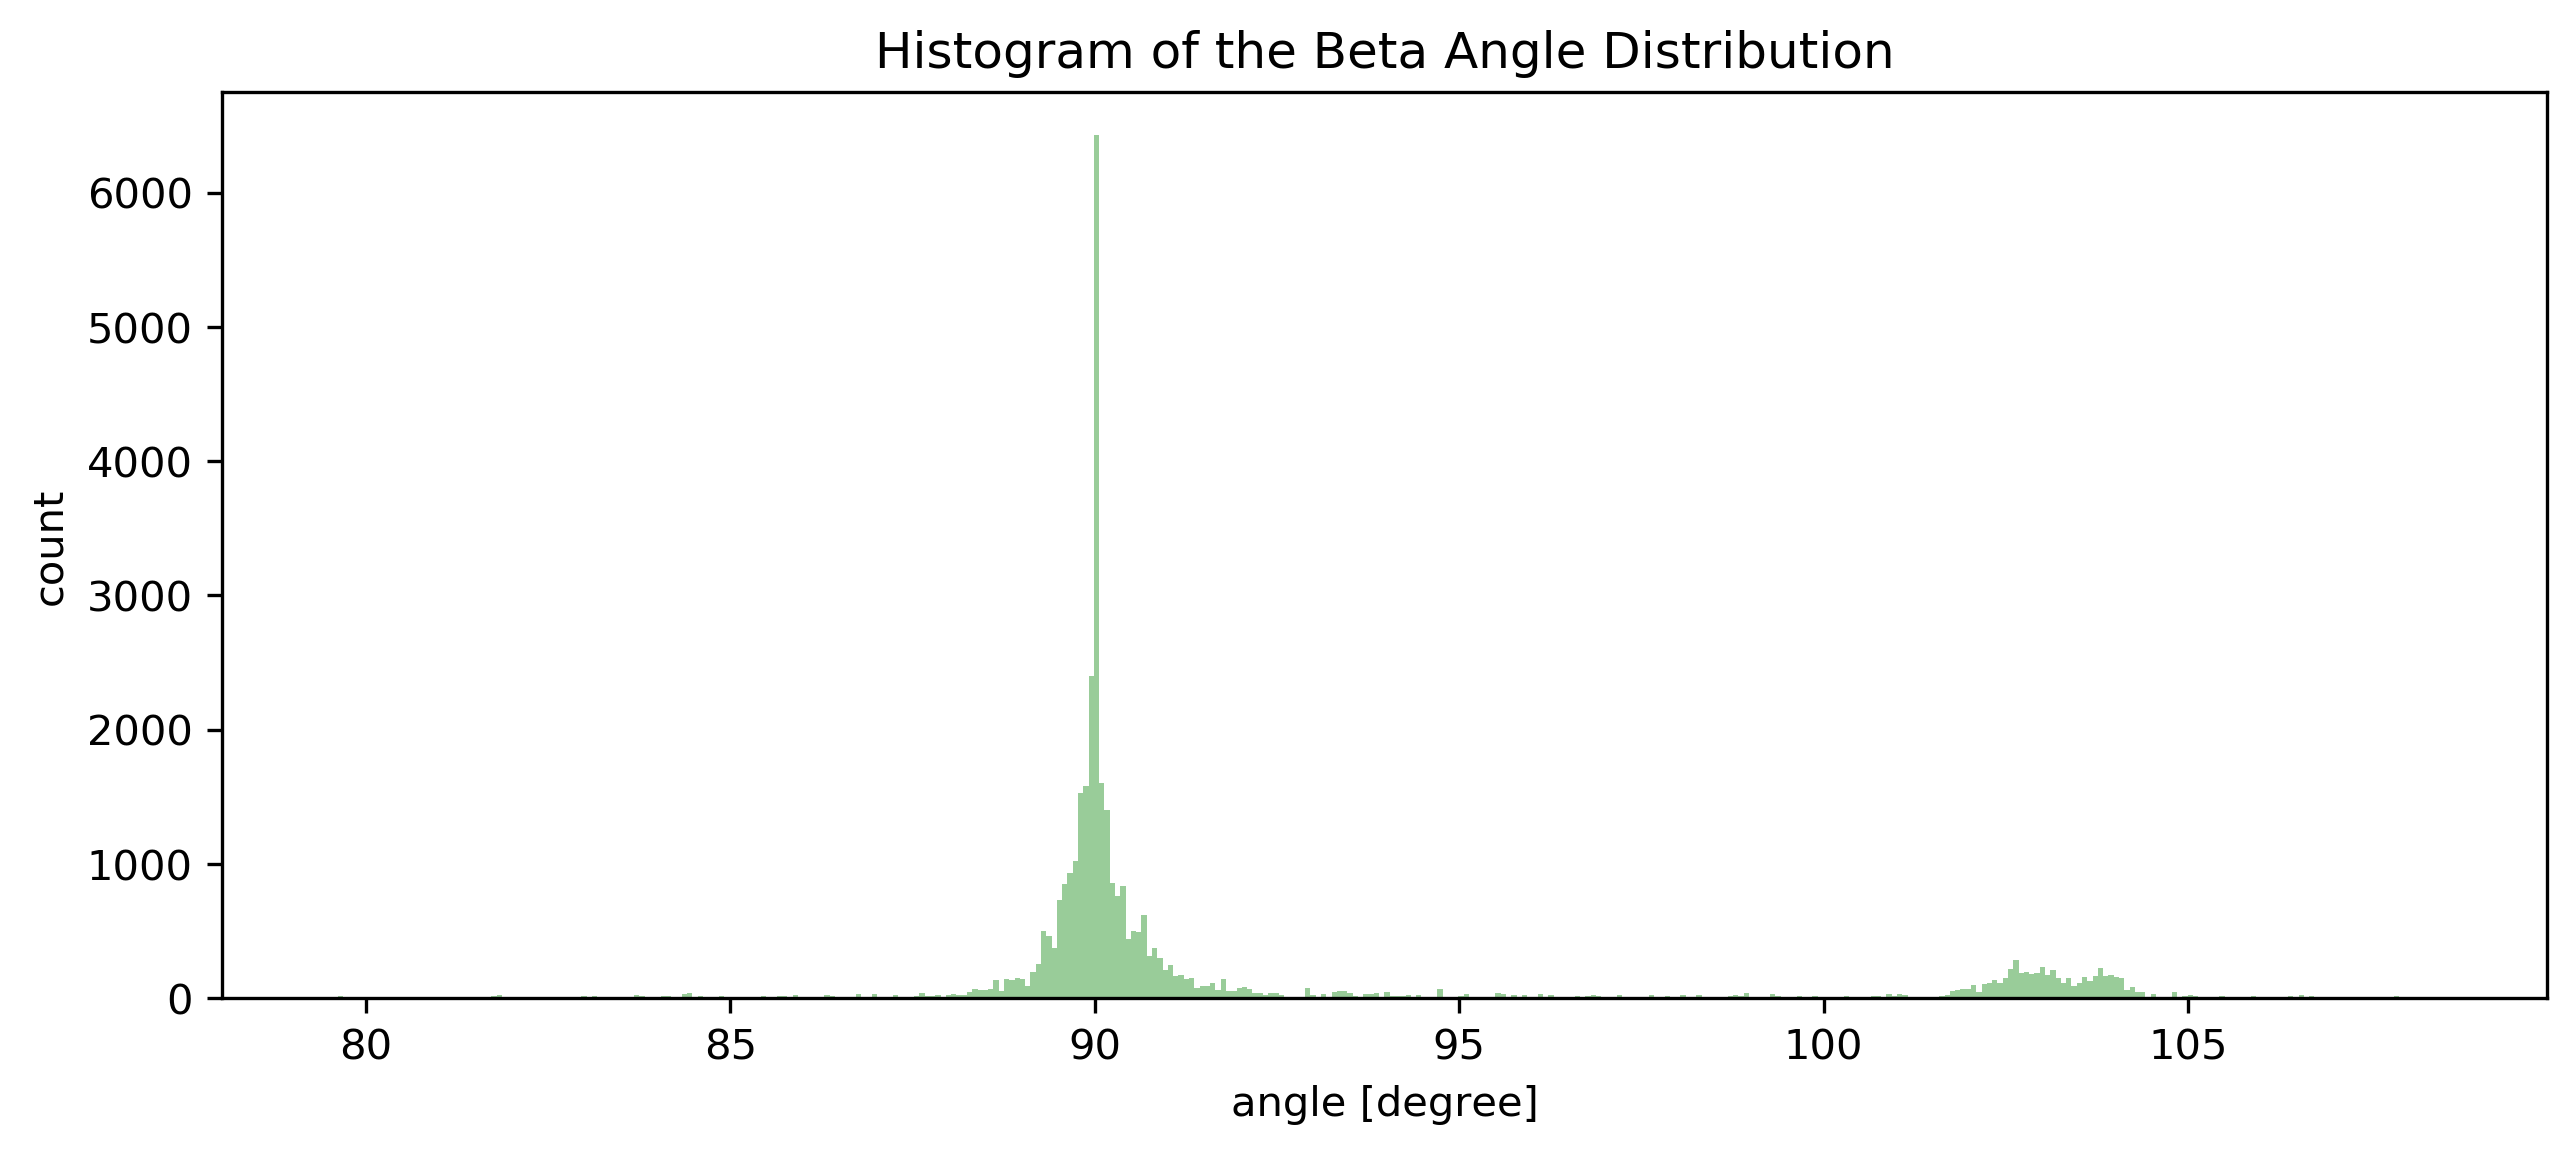

In [263]:
fig = plt.figure(num=None, figsize=(10, 4), dpi=300, facecolor='w', edgecolor='k')
sns.distplot([i[1] for i in angles], color="green", norm_hist=False, hist=True, bins=400, axlabel="angle [degree]", kde=False)
plt.ylabel("count")
plt.title("Histogram of the Beta Angle Distribution")

Text(0.5, 1.0, 'Histogram of the Gamma Angle Distribution')

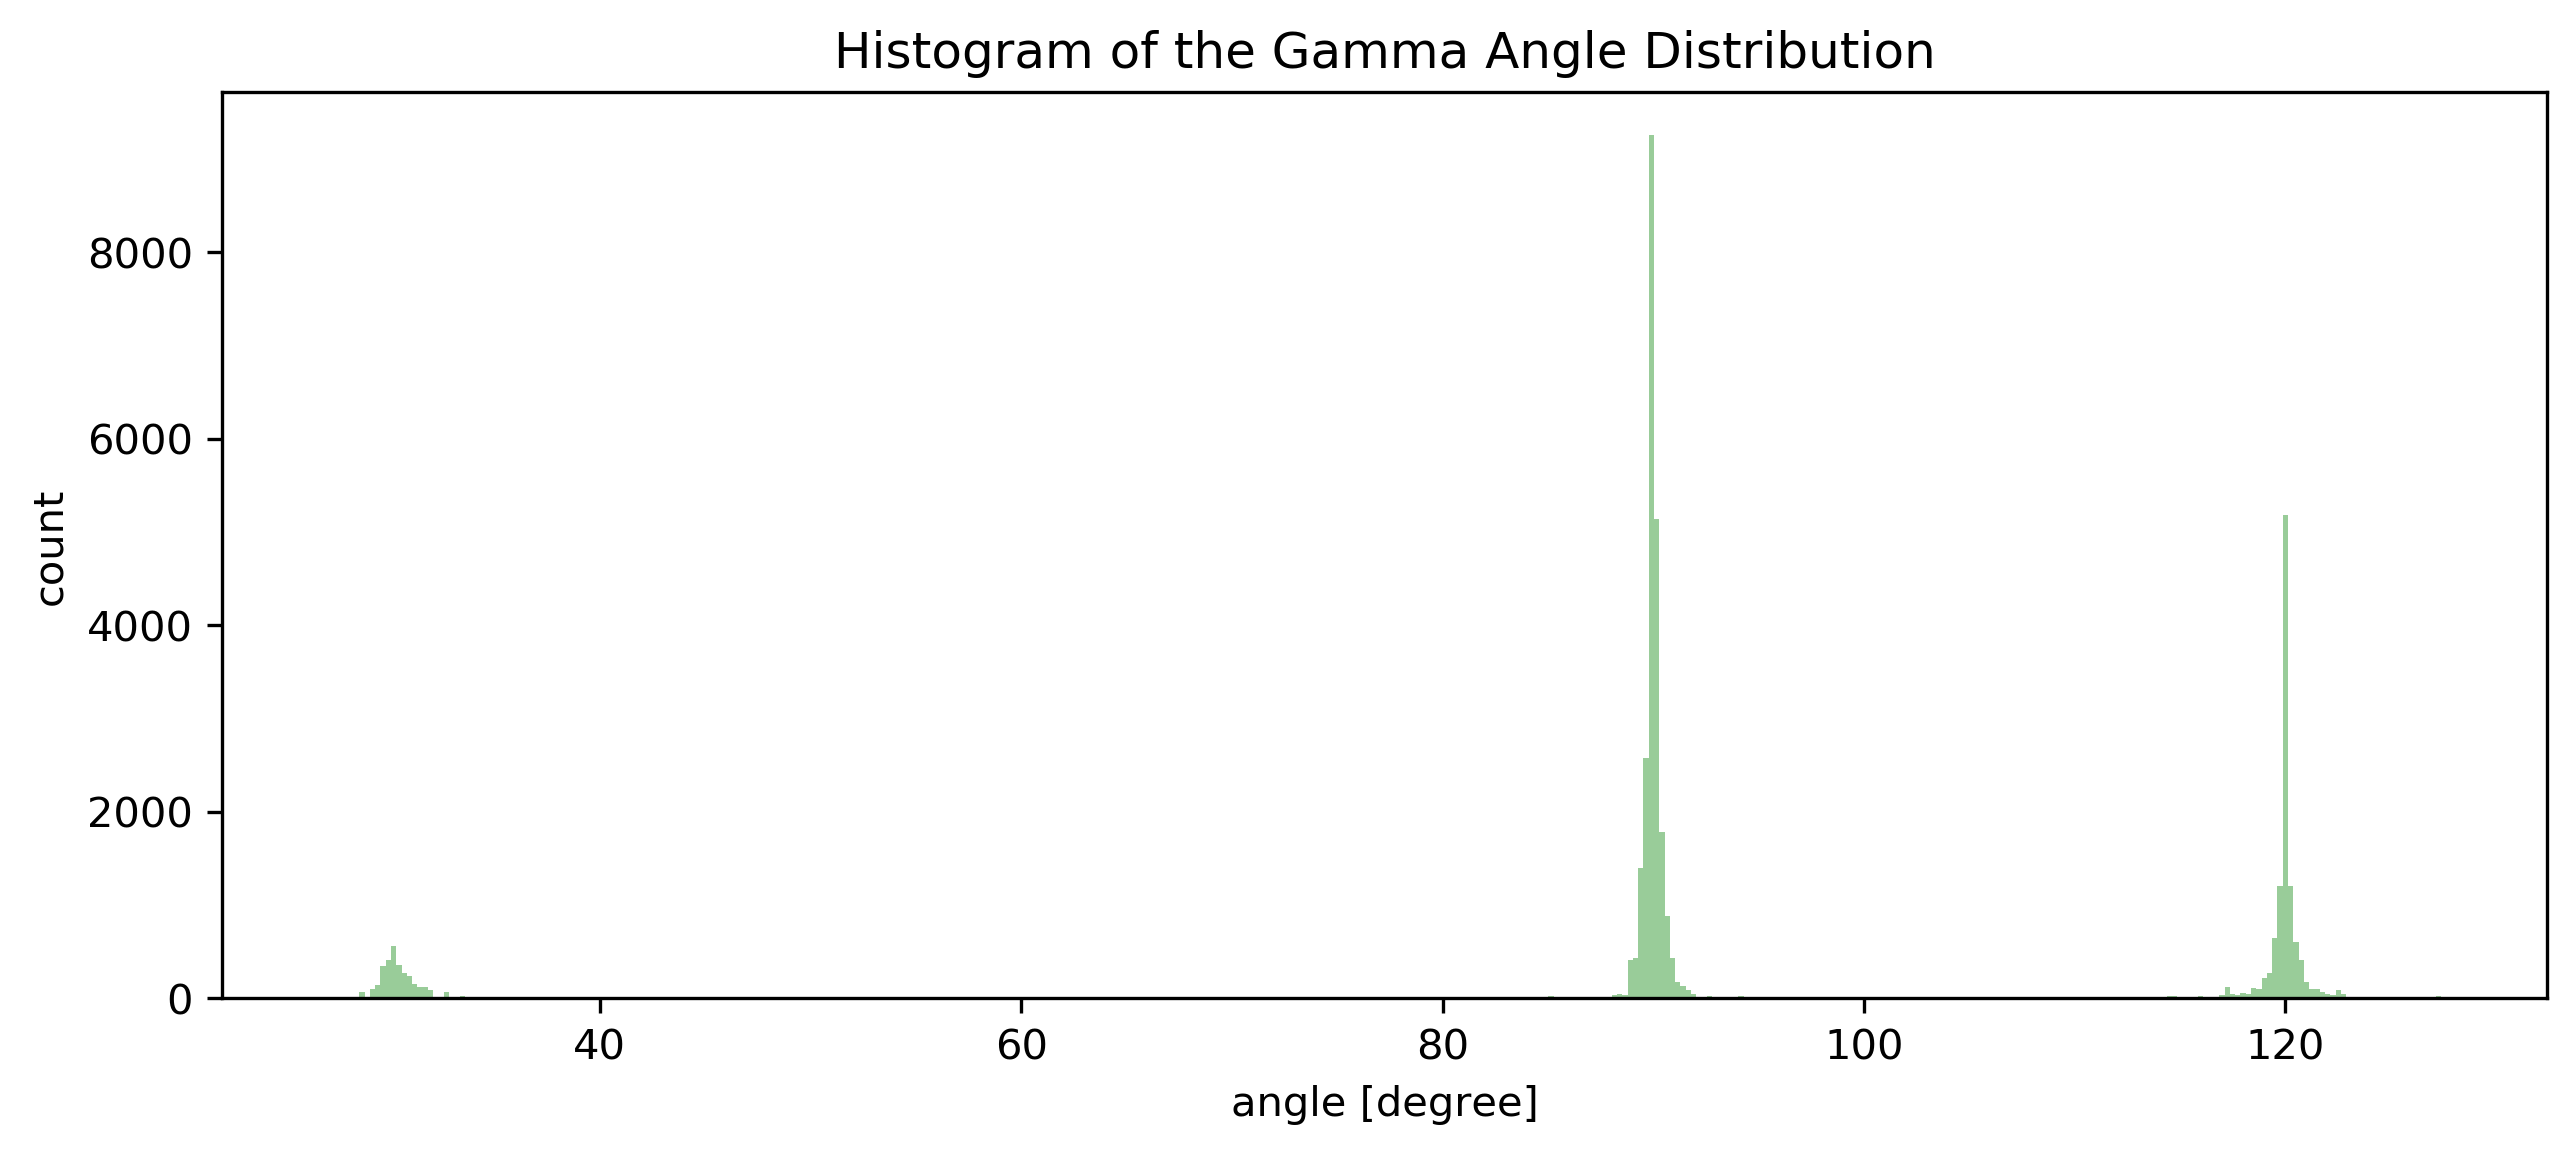

In [264]:
fig = plt.figure(num=None, figsize=(10, 4), dpi=300, facecolor='w', edgecolor='k')
sns.distplot([i[2] for i in angles], color="green", norm_hist=False, hist=True, bins=400, axlabel="angle [degree]", kde=False)
plt.ylabel("count")
plt.title("Histogram of the Gamma Angle Distribution")

Text(0.5, 1.0, 'Histogram of the Angle Distribution')

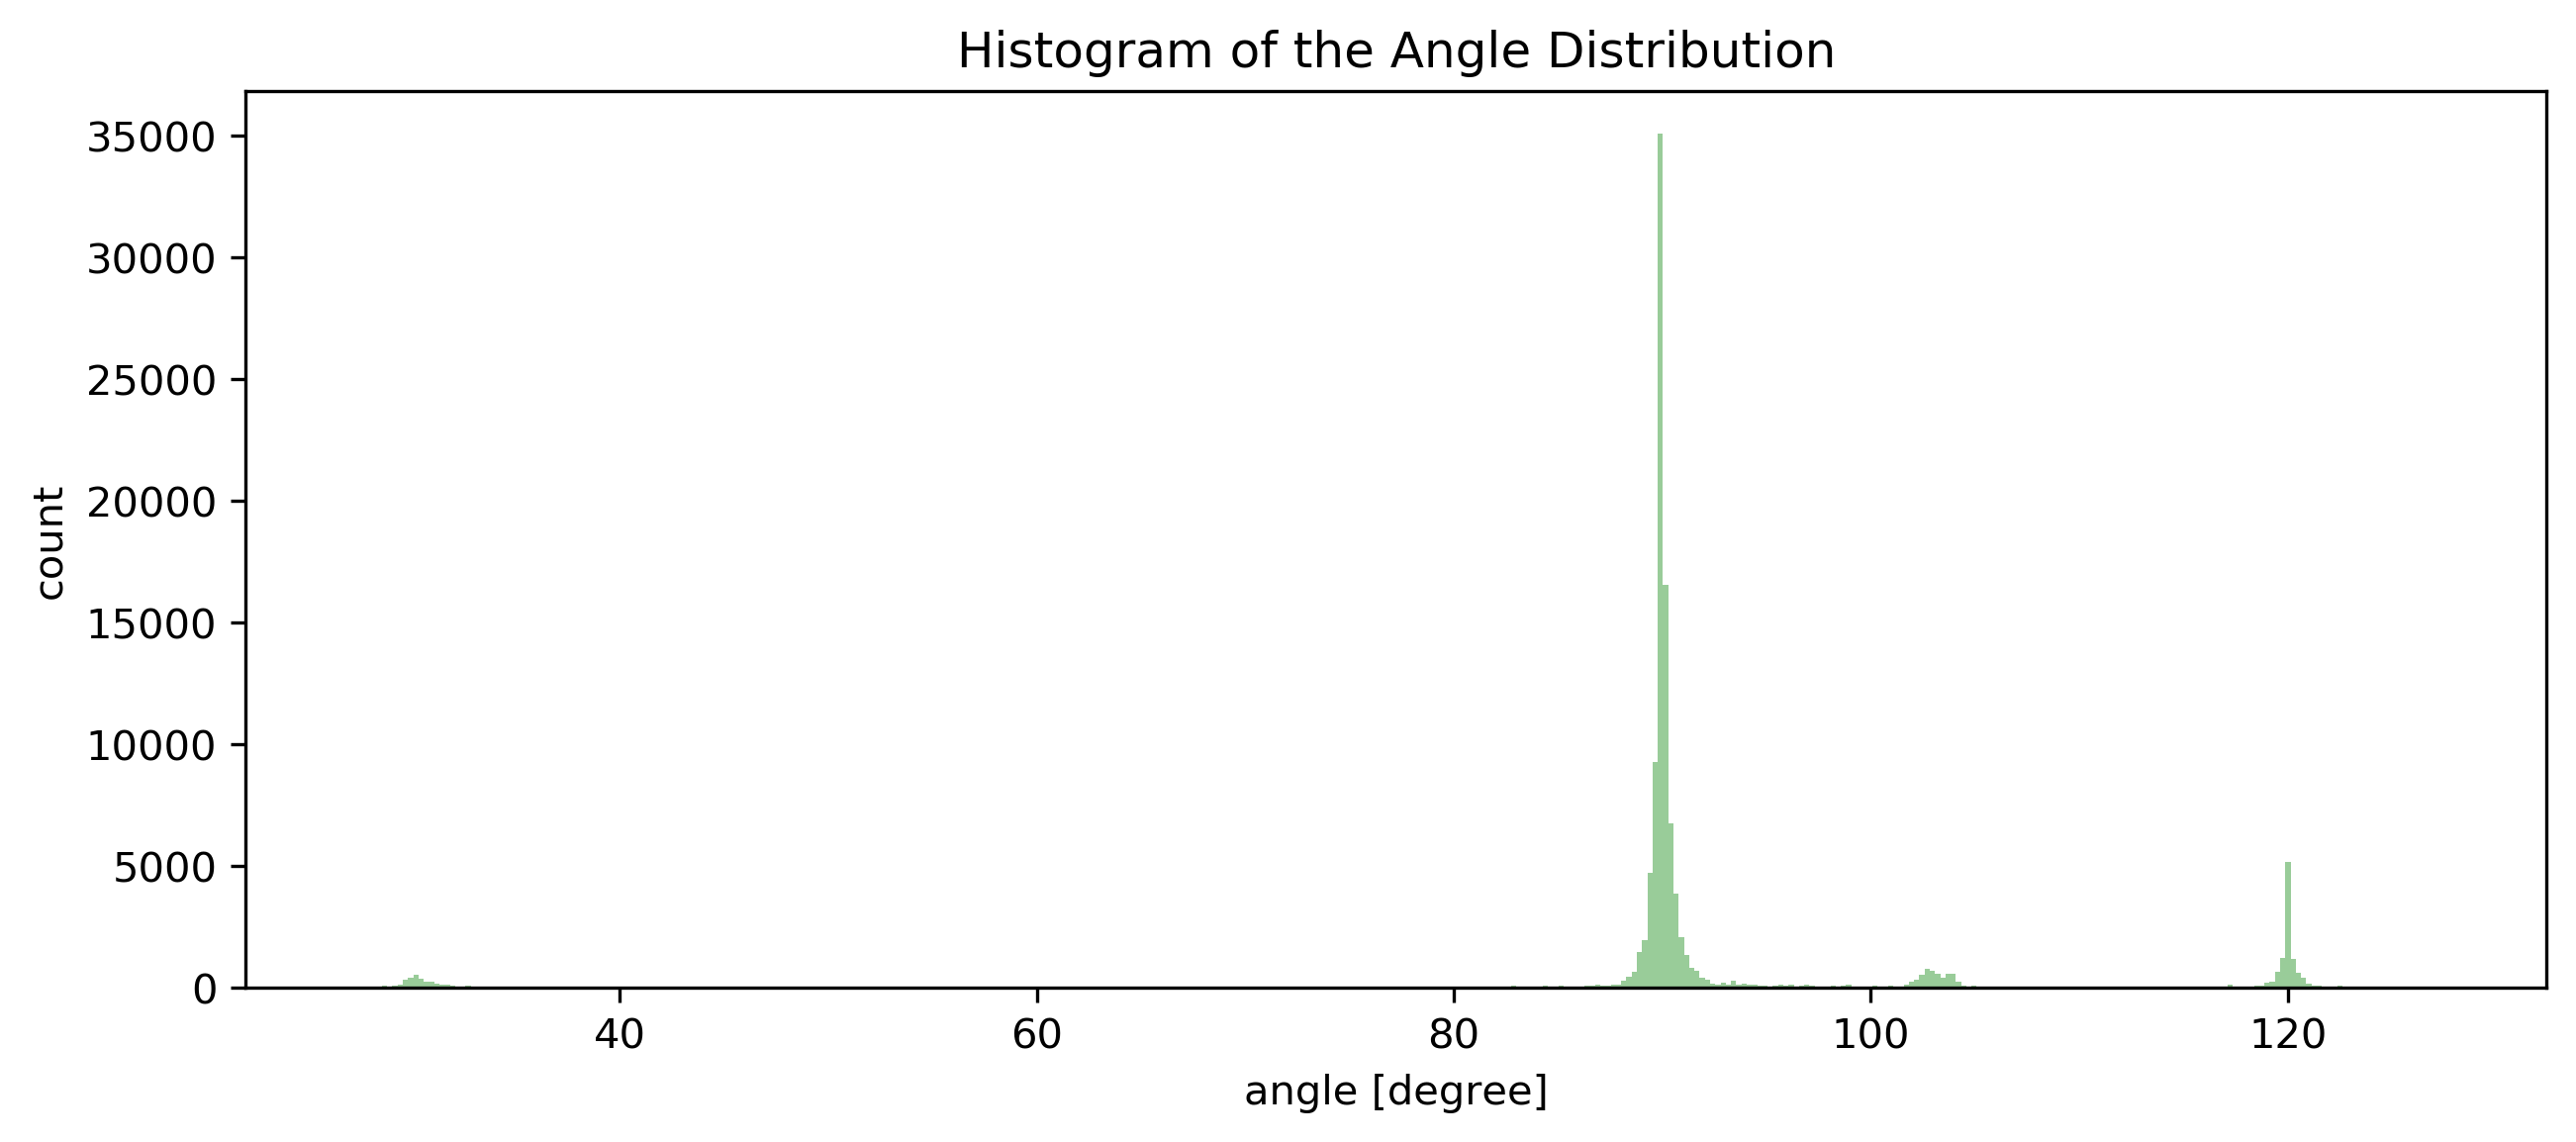

In [270]:
fig = plt.figure(num=None, figsize=(10, 4), dpi=300, facecolor='w', edgecolor='k')
sns.distplot([i[0] for i in angles]+[i[1] for i in angles]+[i[2] for i in angles], color="green", norm_hist=False, hist=True, bins=400, axlabel="angle [degree]", kde=False)
plt.ylabel("count")
plt.title("Histogram of the Angle Distribution")

# Histograms - Lattice Vectors

Text(0.5, 1.0, 'Histogram of the 1st Lattice Vector Length Distribution')

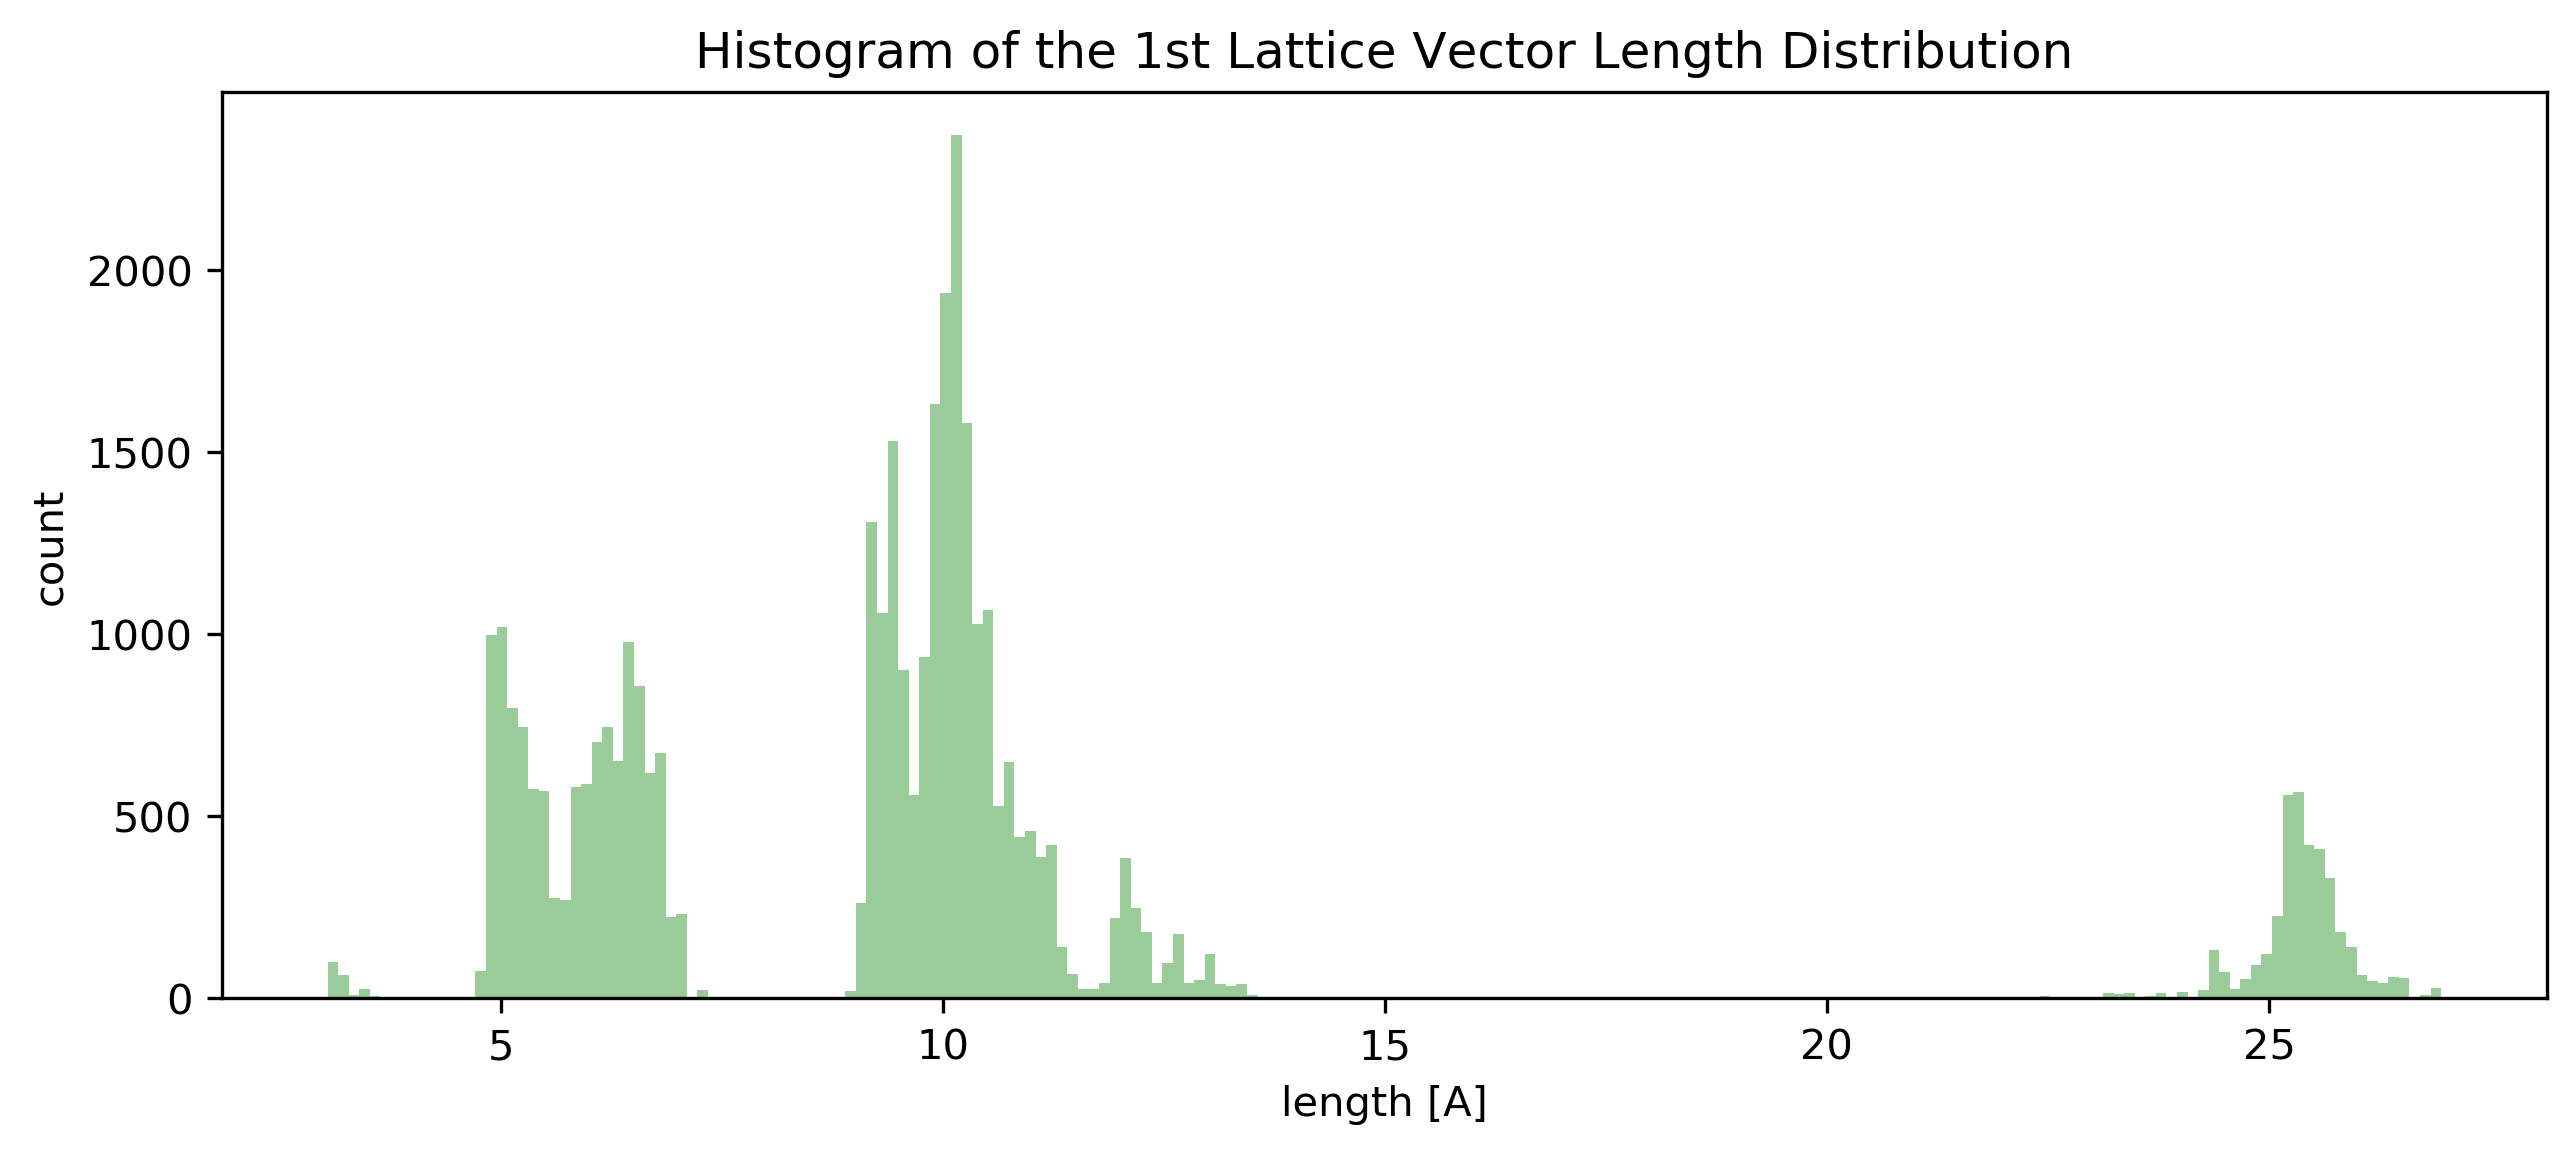

In [314]:
fig = plt.figure(num=None, figsize=(10, 4), dpi=300, facecolor='w', edgecolor='k')
sns.distplot([i[0] for i in lengths], color="green", norm_hist=False, hist=True, bins=200, axlabel="length [A]", kde=False)
plt.ylabel("count")
plt.title("Histogram of the 1st Lattice Vector Length Distribution")

Text(0.5, 1.0, 'Histogram of the 2st Lattice Vector Length Distribution')

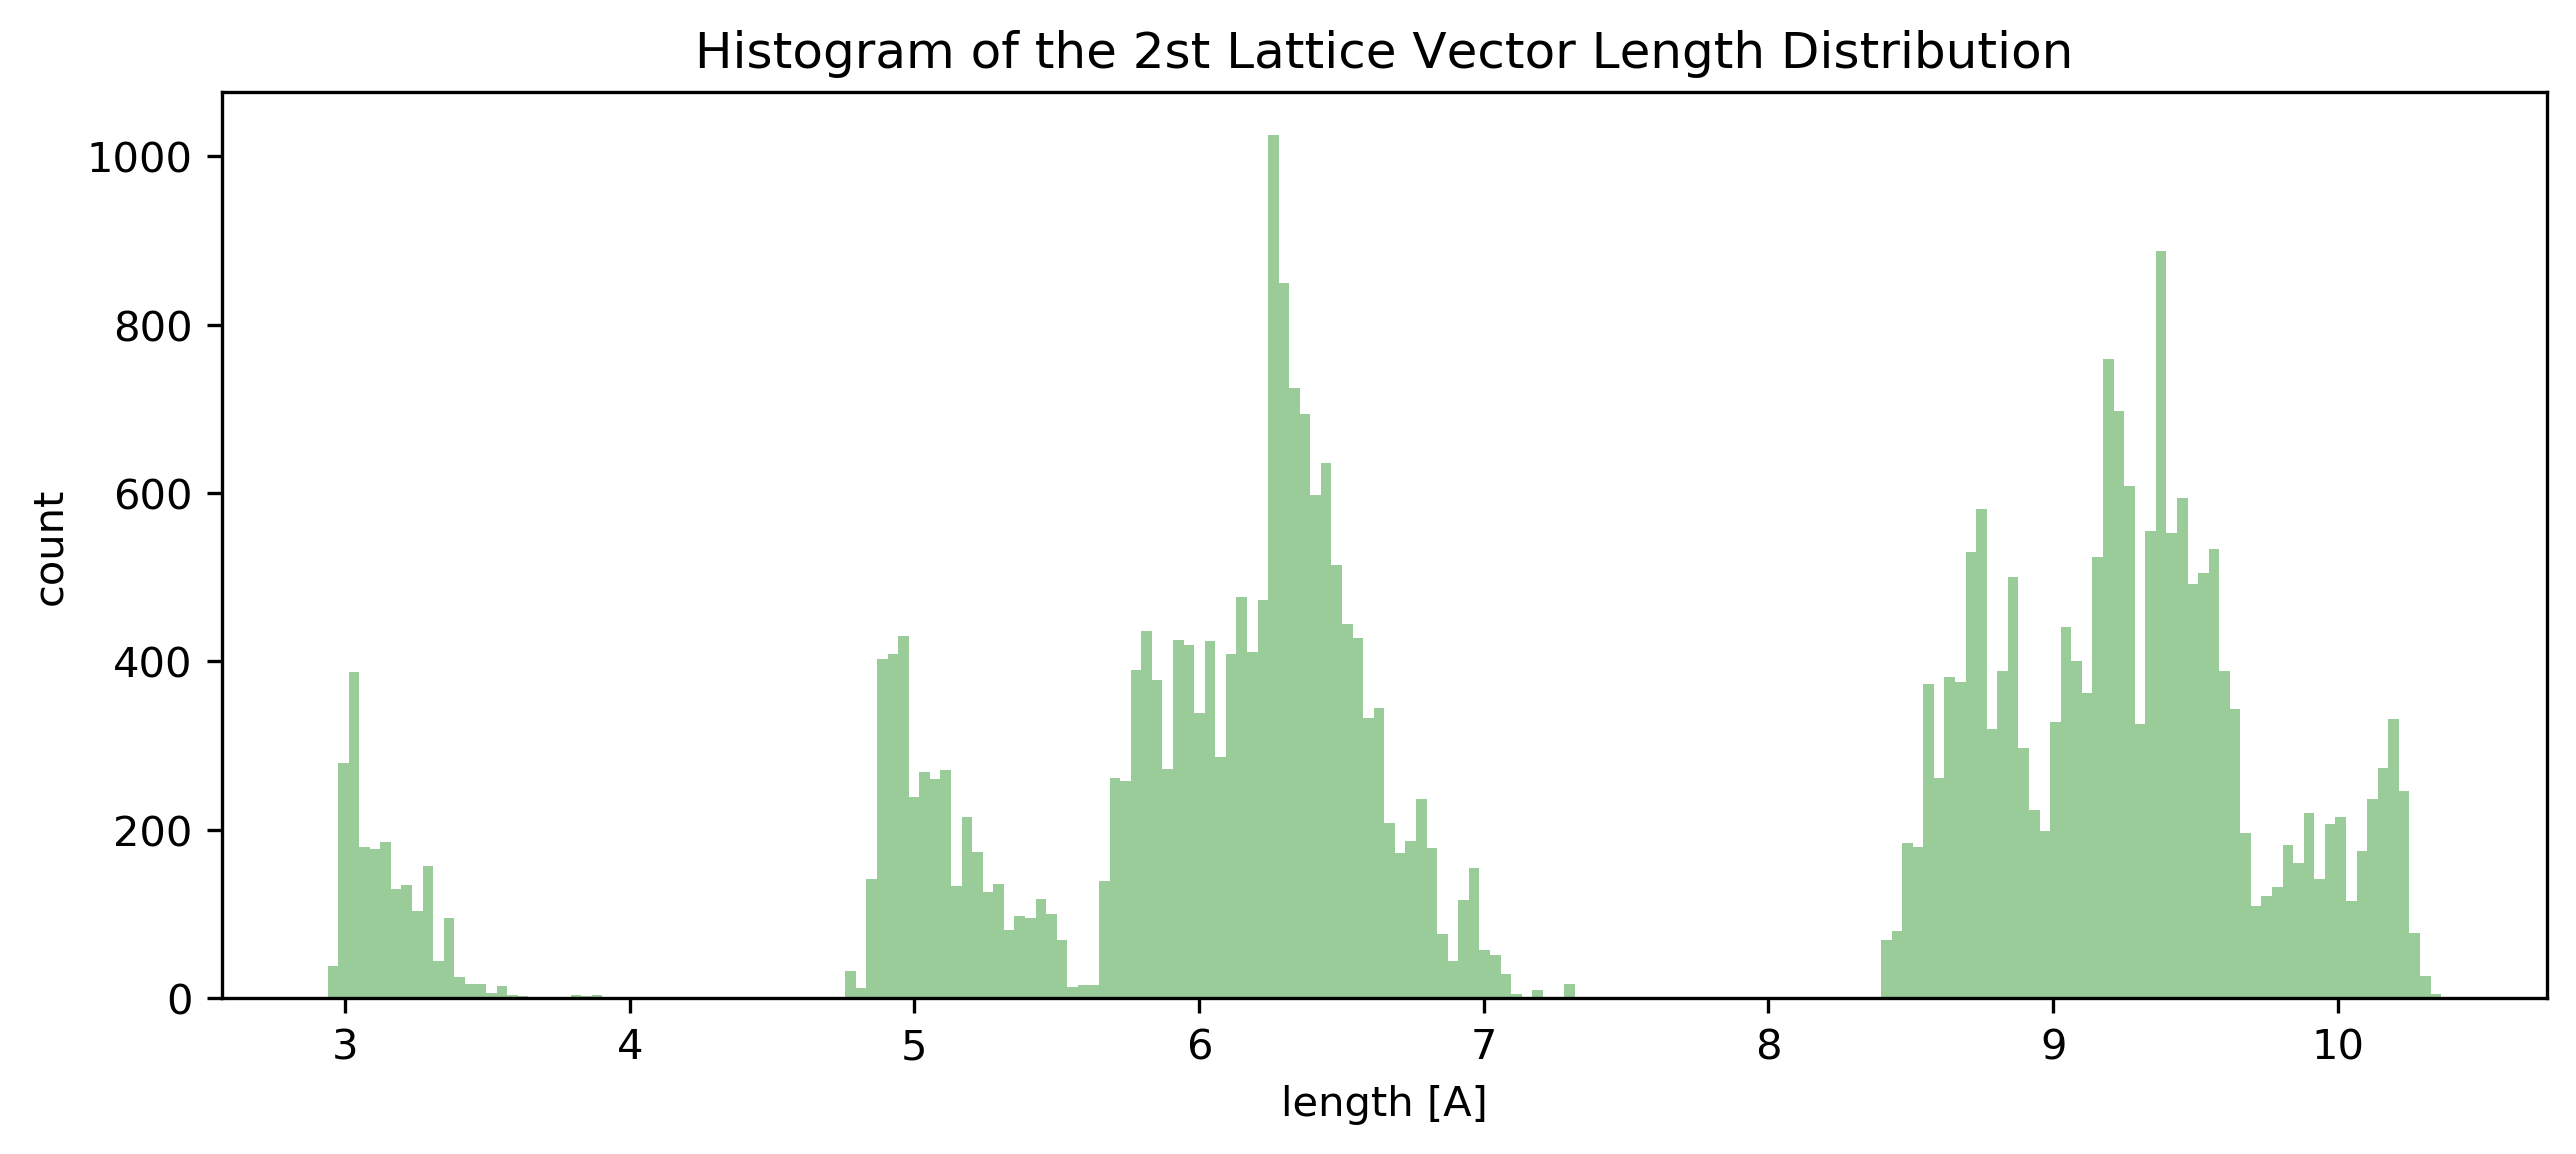

In [313]:
fig = plt.figure(num=None, figsize=(10, 4), dpi=300, facecolor='w', edgecolor='k')
sns.distplot([i[1] for i in lengths], color="green", norm_hist=False, hist=True, bins=200, axlabel="length [A]", kde=False)
plt.ylabel("count")
plt.title("Histogram of the 2st Lattice Vector Length Distribution")

Text(0.5, 1.0, 'Histogram of the 3st Lattice Vector Length Distribution')

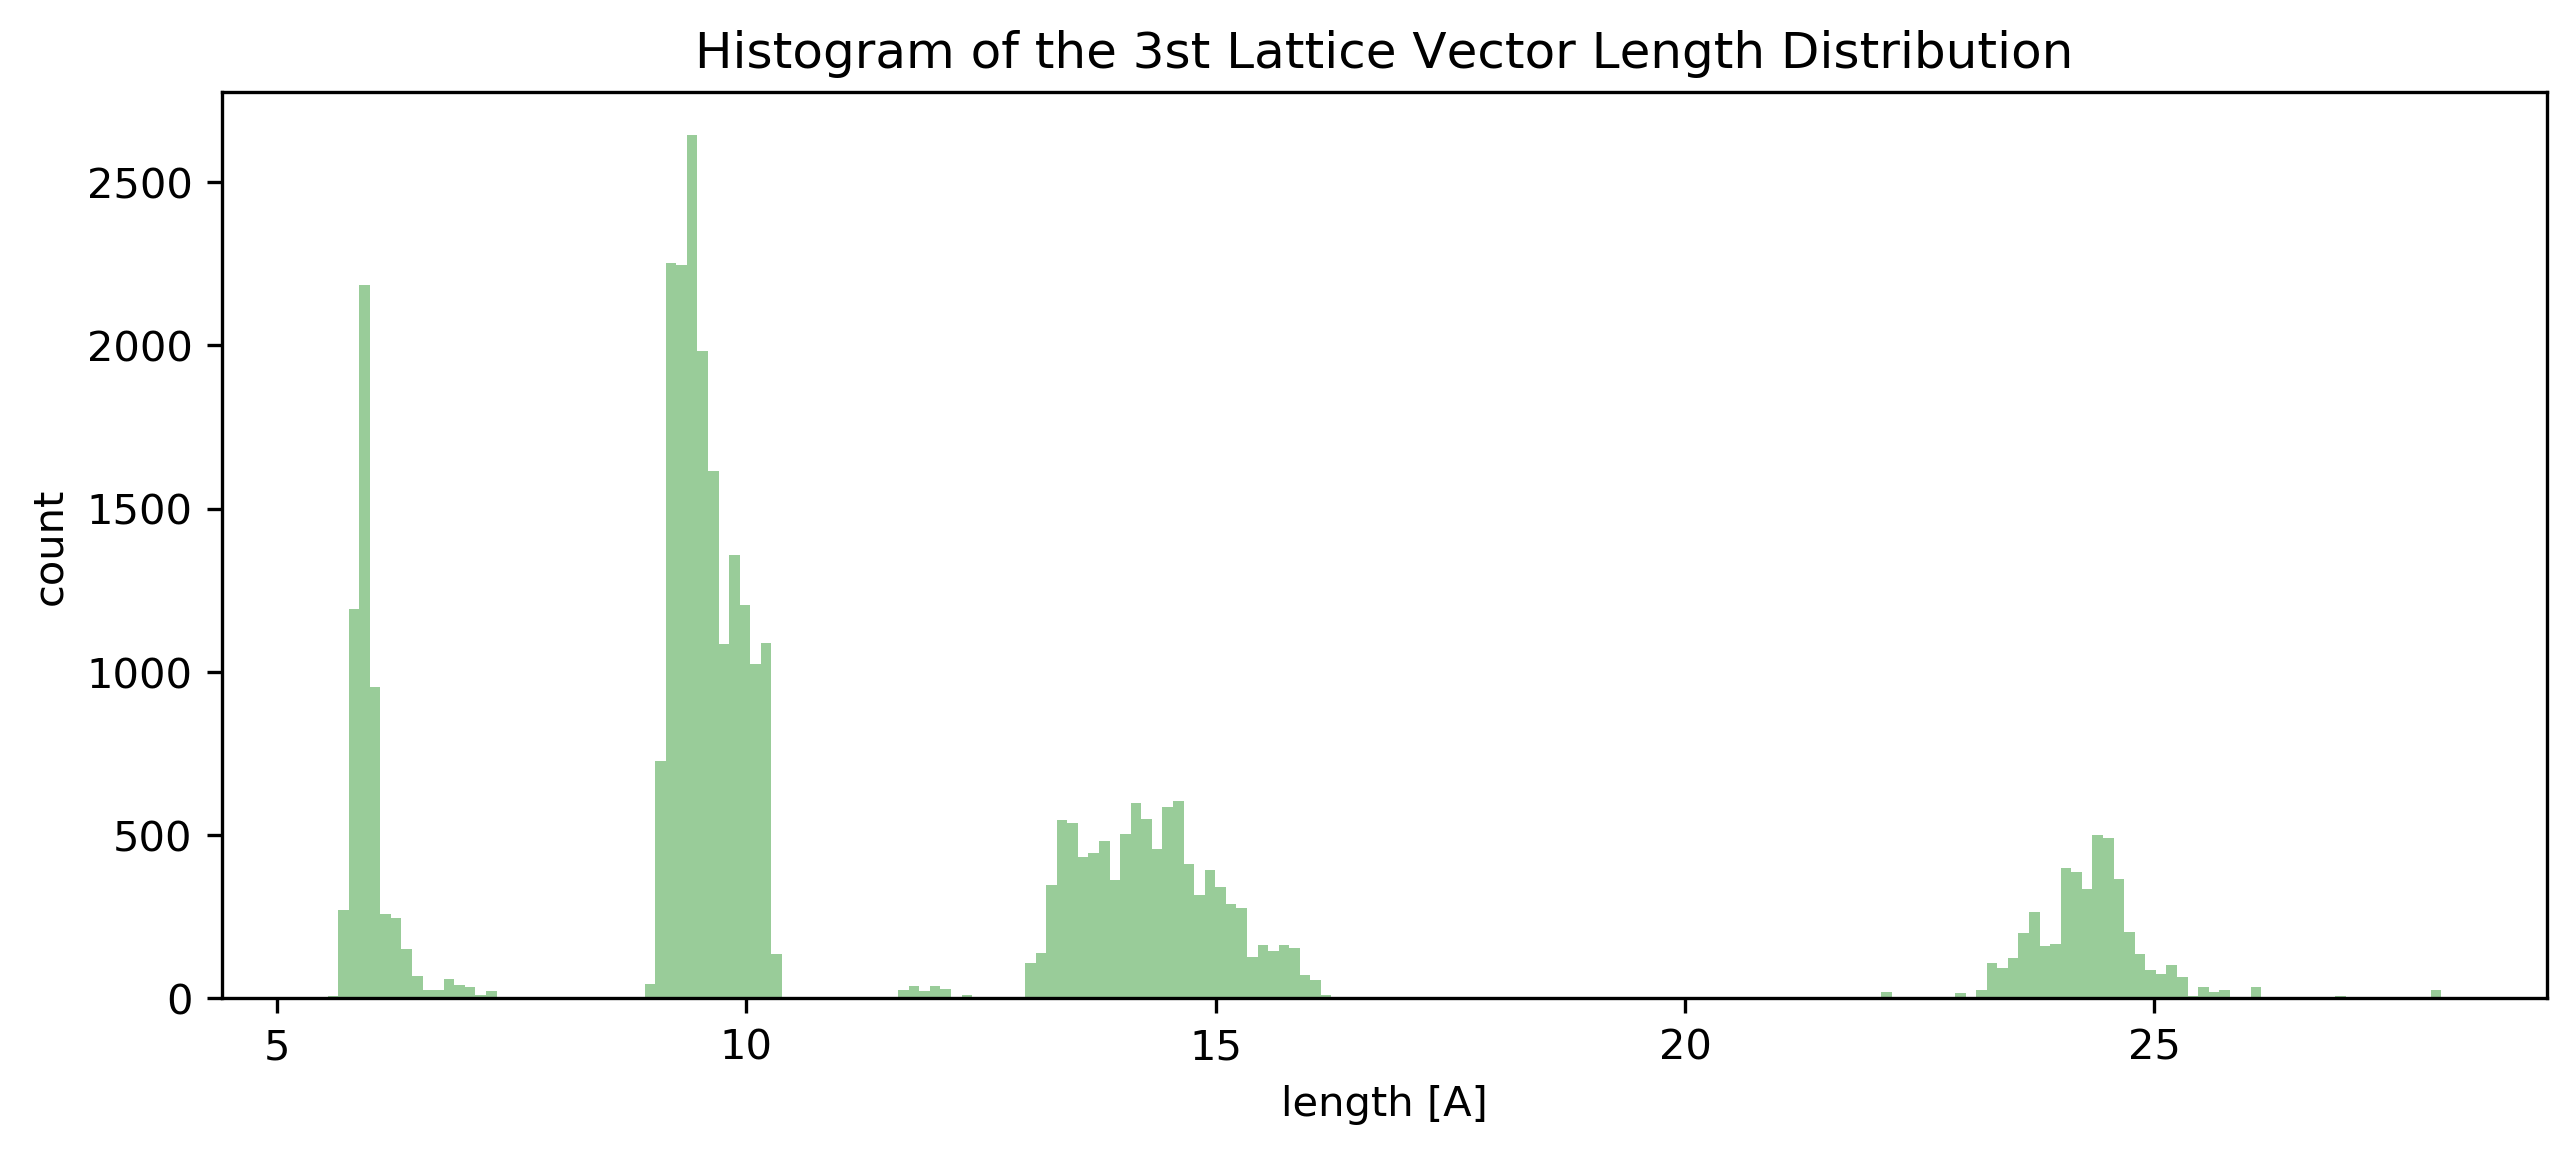

In [312]:
fig = plt.figure(num=None, figsize=(10, 4), dpi=300, facecolor='w', edgecolor='k')
sns.distplot([i[2] for i in lengths], color="green", norm_hist=False, hist=True, bins=200, axlabel="length [A]", kde=False)
plt.ylabel("count")
plt.title("Histogram of the 3st Lattice Vector Length Distribution")

Text(0.5, 1.0, 'Histogram of the Lattice Vector Length Distribution')

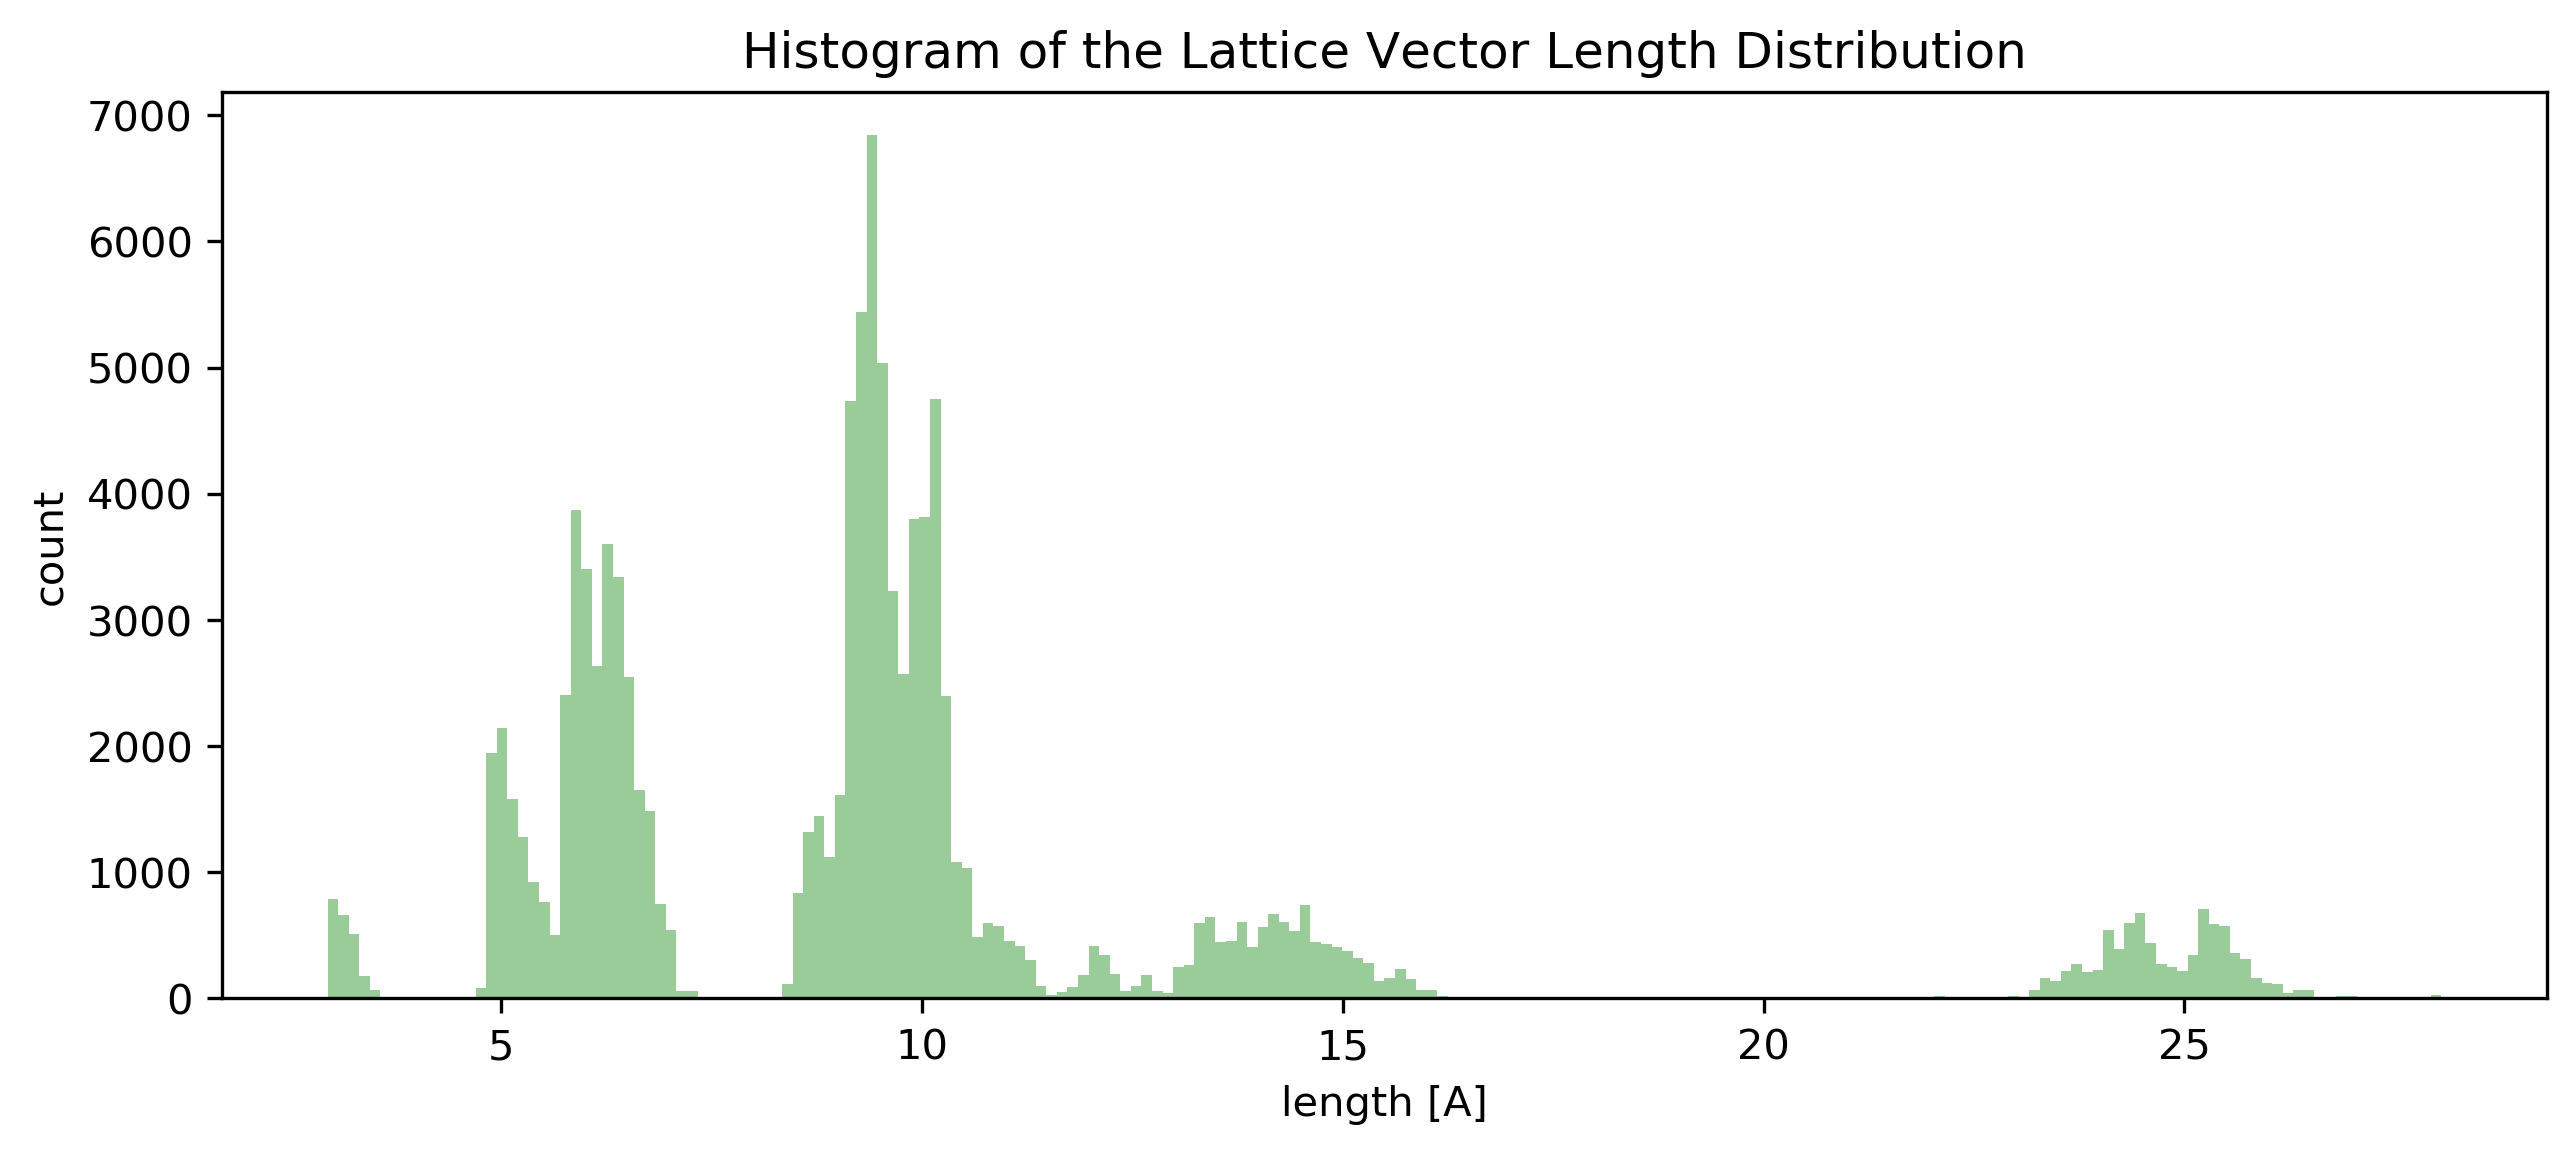

In [274]:
fig = plt.figure(num=None, figsize=(10, 4), dpi=300, facecolor='w', edgecolor='k')
sns.distplot([i[0] for i in lengths]+[i[1] for i in lengths]+[i[2] for i in lengths], color="green", norm_hist=False, hist=True, bins=200, axlabel="length [A]", kde=False)
plt.ylabel("count")
plt.title("Histogram of the Lattice Vector Length Distribution")

# Histograms - Forces Vectors

(-0.1, 0.1)

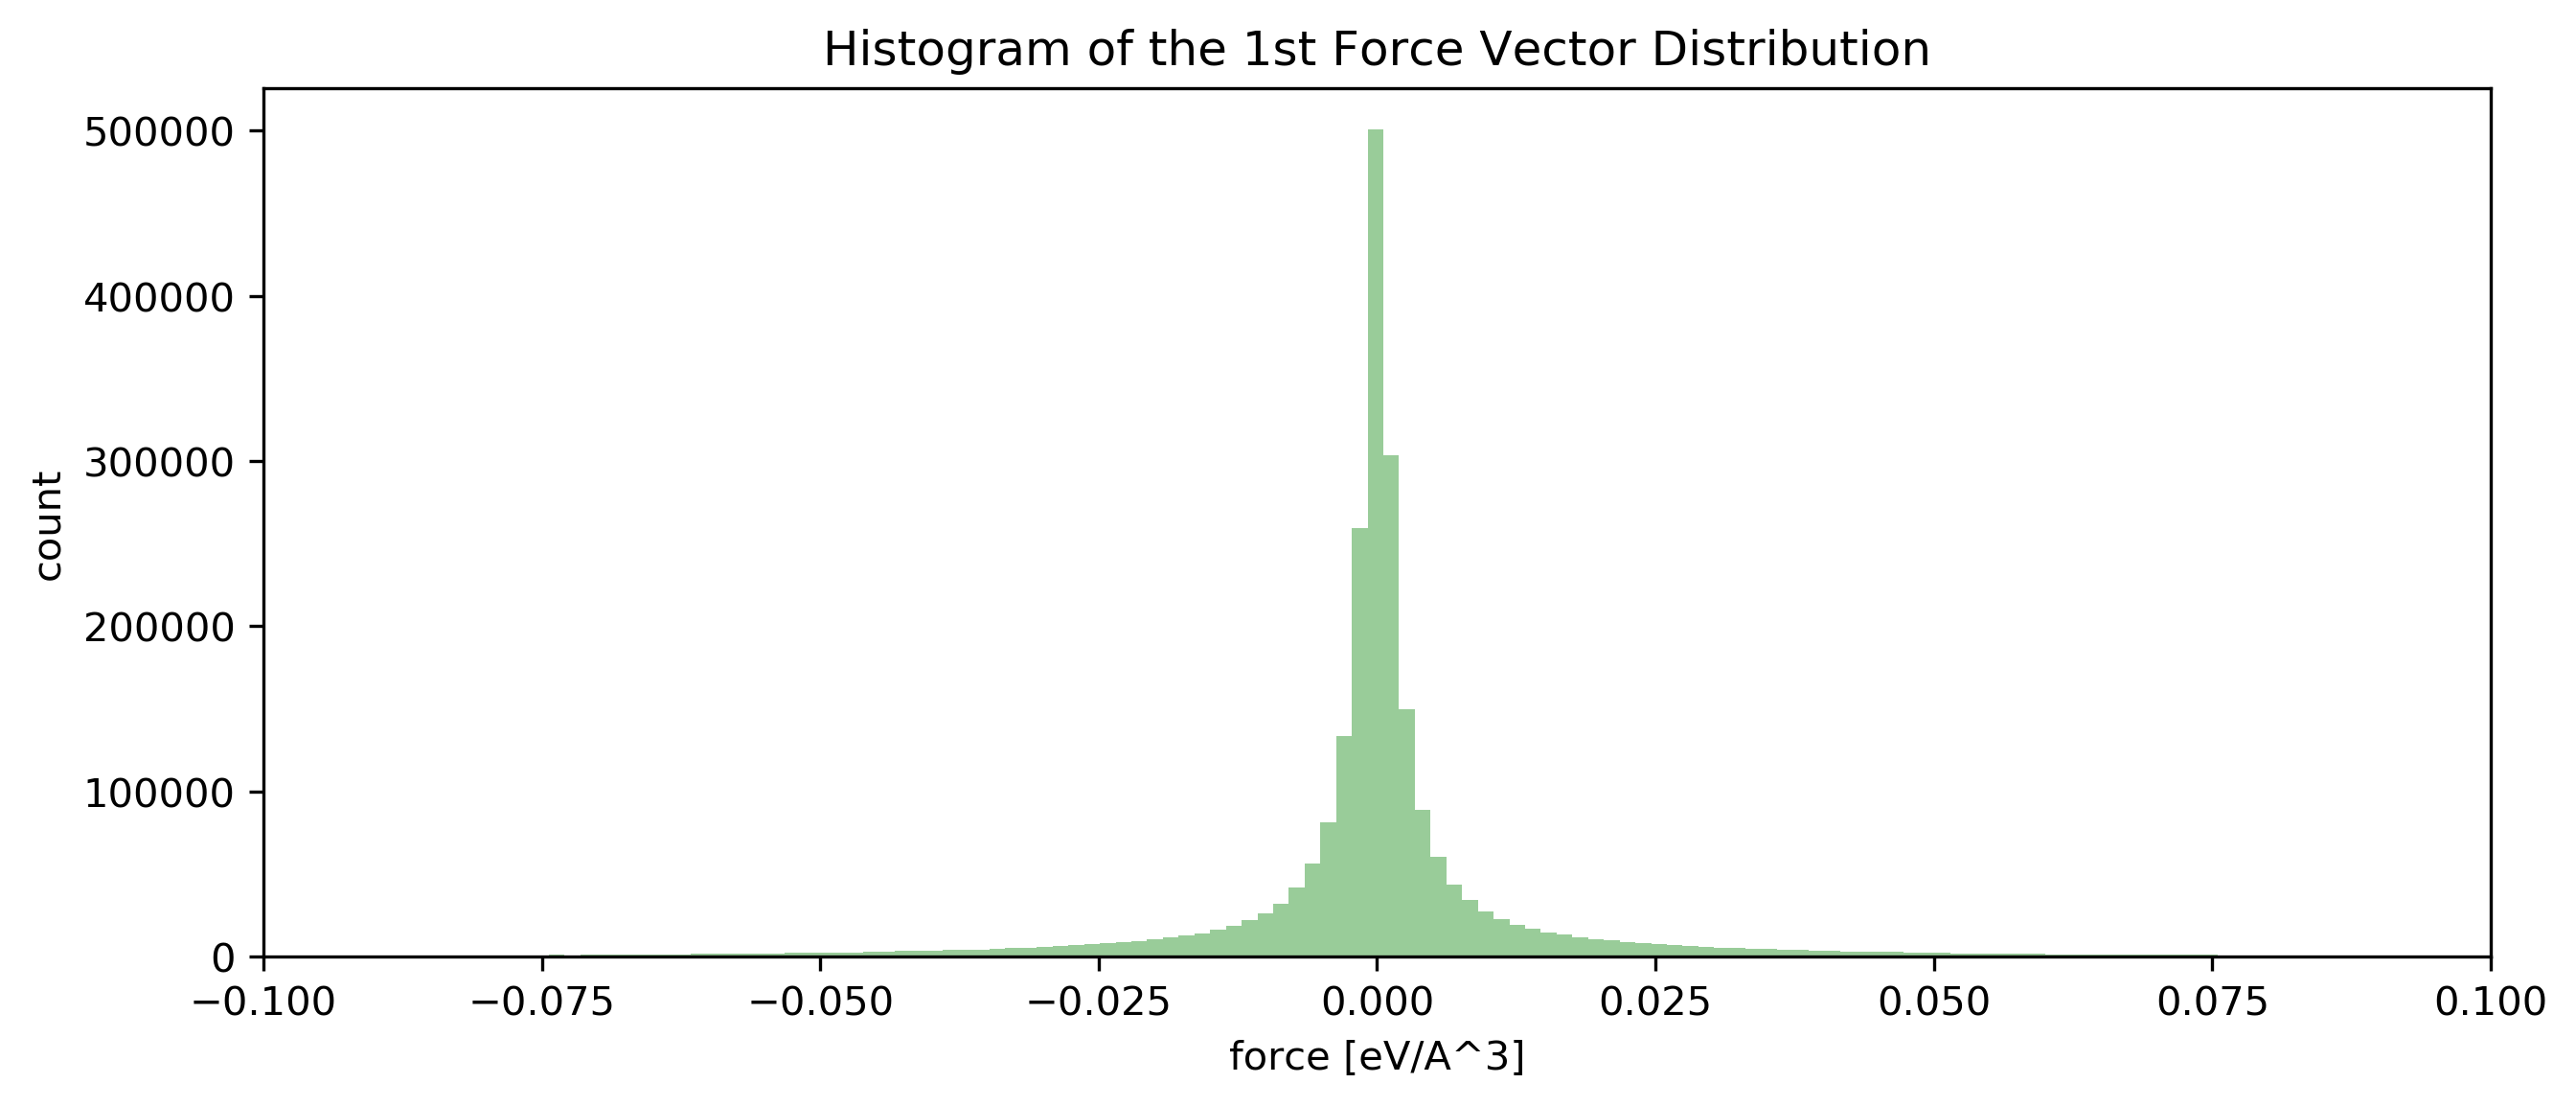

In [296]:
fig = plt.figure(num=None, figsize=(10, 4), dpi=300, facecolor='w', edgecolor='k')
sns.distplot(df_force["Fx"], color="green", norm_hist=False, hist=True, bins=10000, axlabel="force [eV/A^3]", kde=False)
plt.ylabel("count")
plt.title("Histogram of the x Force Vector Component Distribution")
plt.xlim(-0.1,0.1)

(-0.1, 0.1)

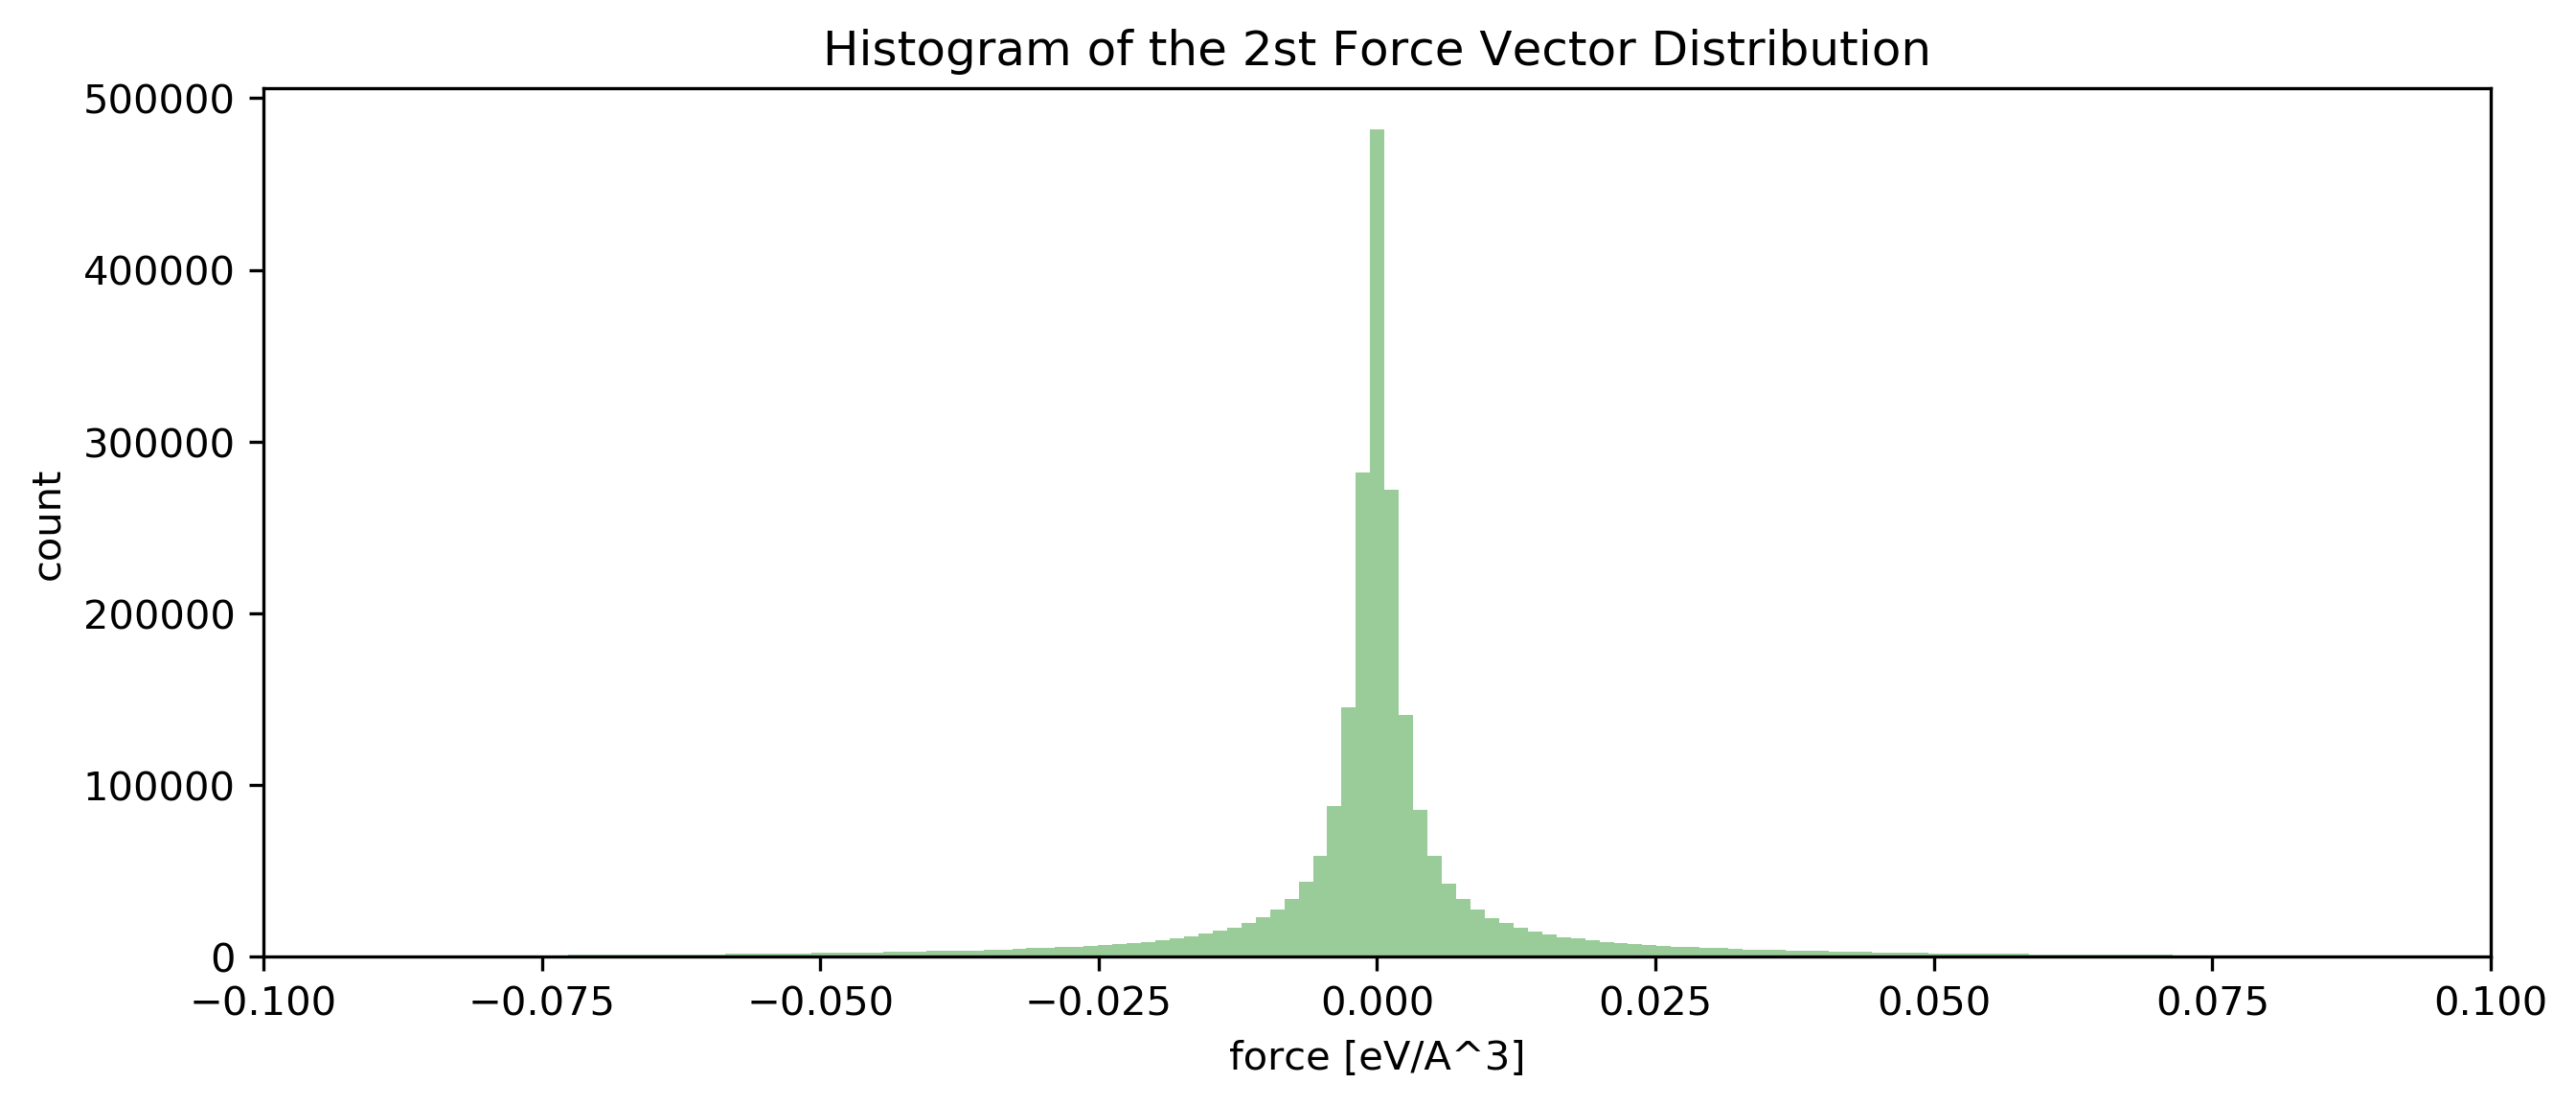

In [297]:
fig = plt.figure(num=None, figsize=(10, 4), dpi=300, facecolor='w', edgecolor='k')
sns.distplot(df_force["Fy"], color="green", norm_hist=False, hist=True, bins=10000, axlabel="force [eV/A^3]", kde=False)
plt.ylabel("count")
plt.title("Histogram of the y Force Vector Component Distribution")
plt.xlim(-0.1,0.1)

(-0.1, 0.1)

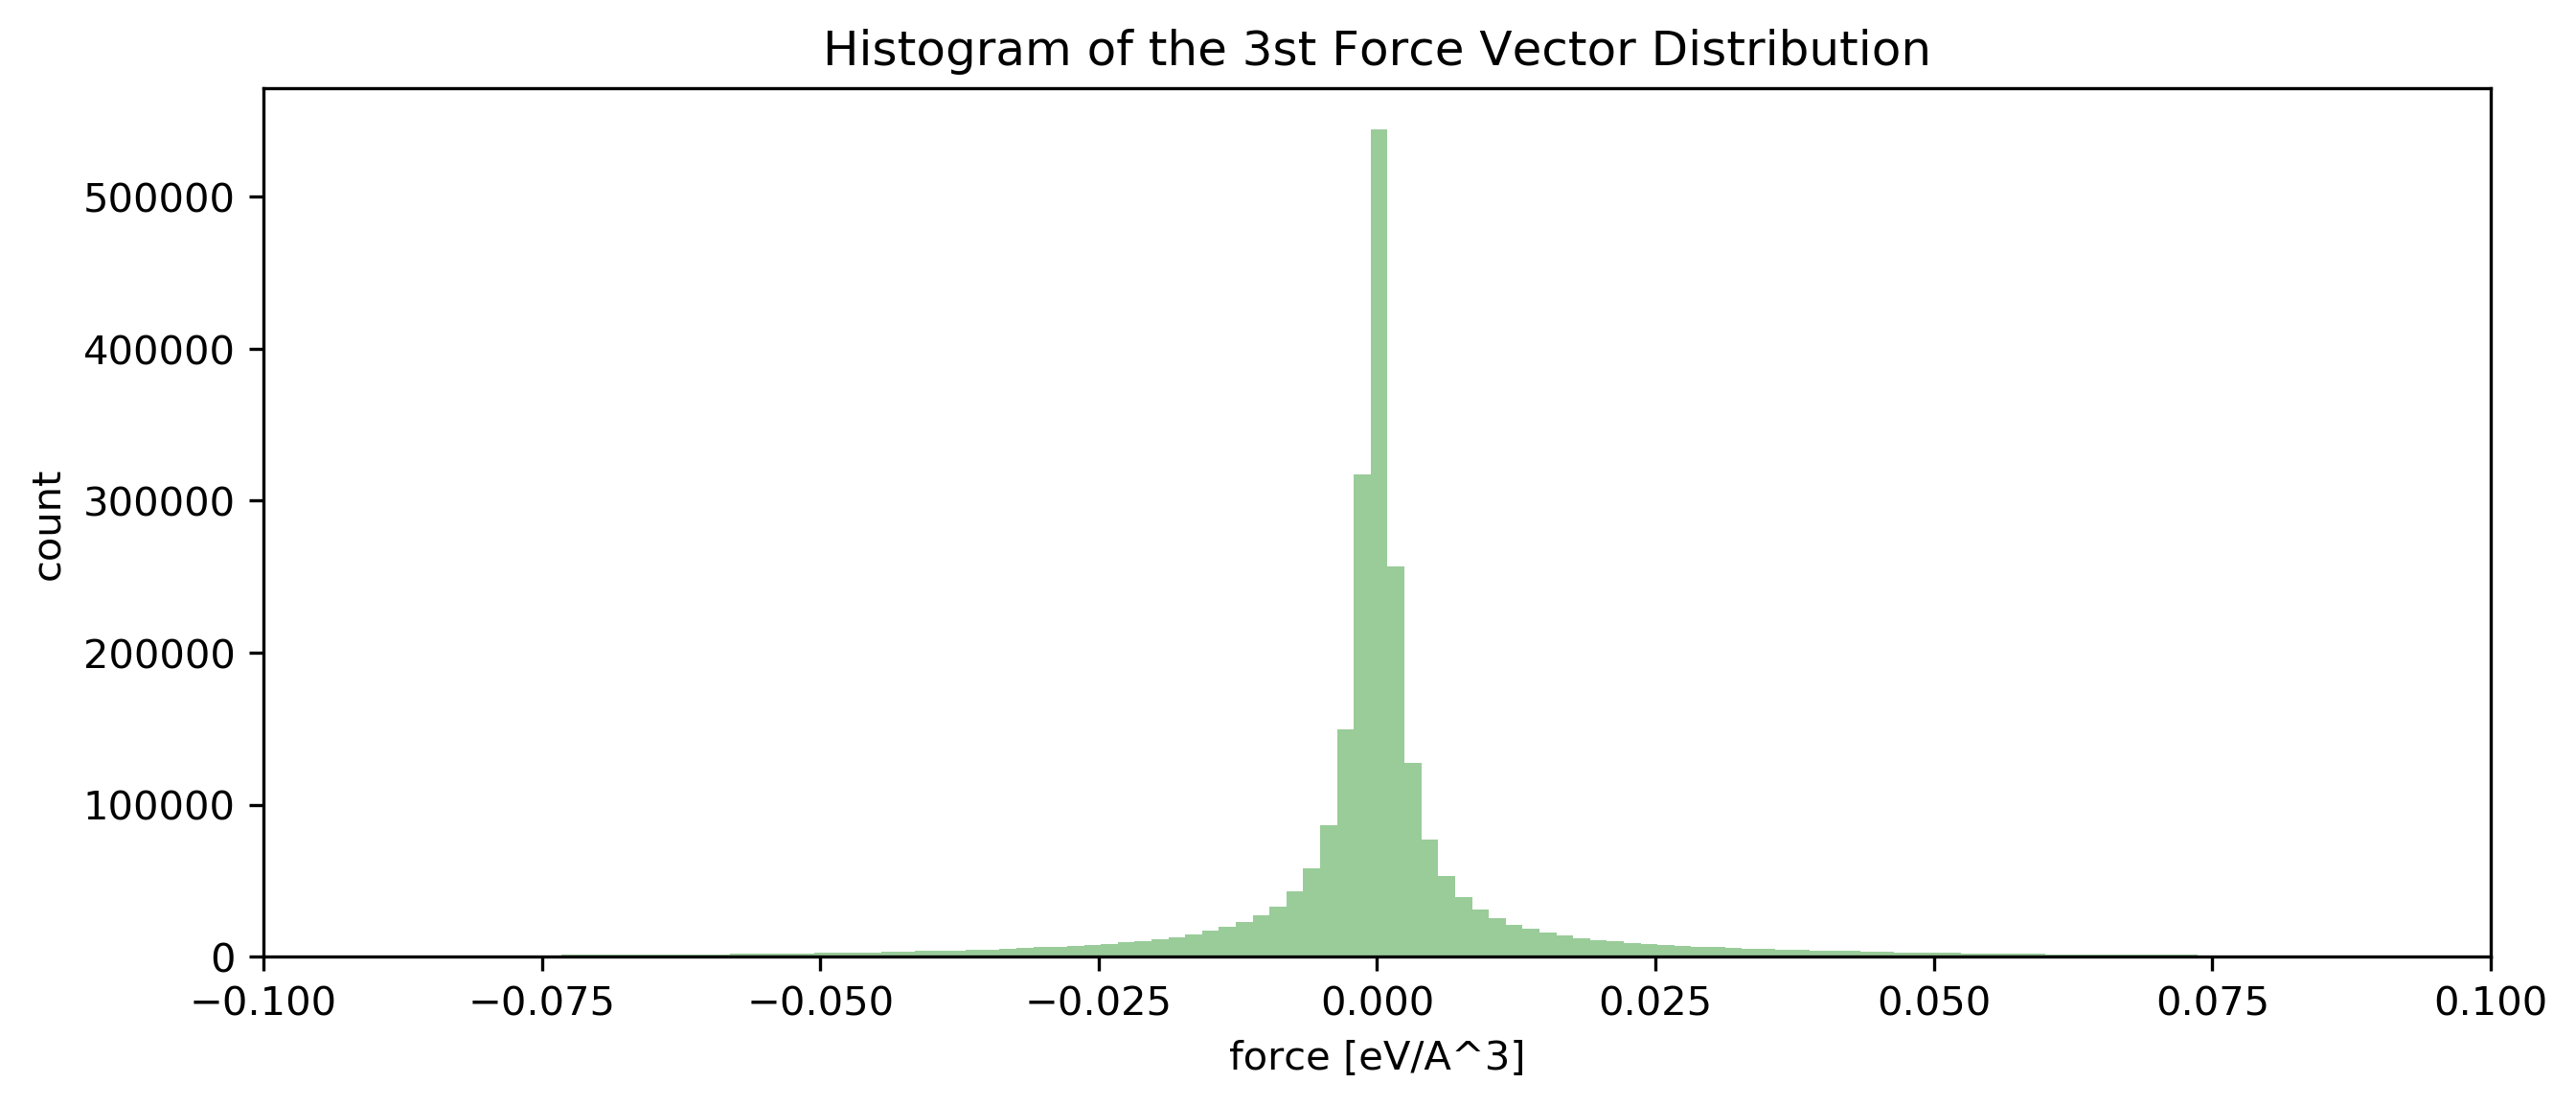

In [298]:
fig = plt.figure(num=None, figsize=(10, 4), dpi=300, facecolor='w', edgecolor='k')
sns.distplot(df_force["Fz"], color="green", norm_hist=False, hist=True, bins=10000, axlabel="force [eV/A^3]", kde=False)
plt.ylabel("count")
plt.title("Histogram of the z Force Vector Component Distribution")
plt.xlim(-0.1,0.1)

In [341]:
fx = df_force["Fx"].to_numpy()
fy = df_force["Fy"].to_numpy()
fz = df_force["Fz"].to_numpy()

In [342]:
force_lengths = [np.linalg.norm([fx[i],fy[i],fz[i]],ord=2) for i in range(len(df_force))]

(-0.05, 0.2)

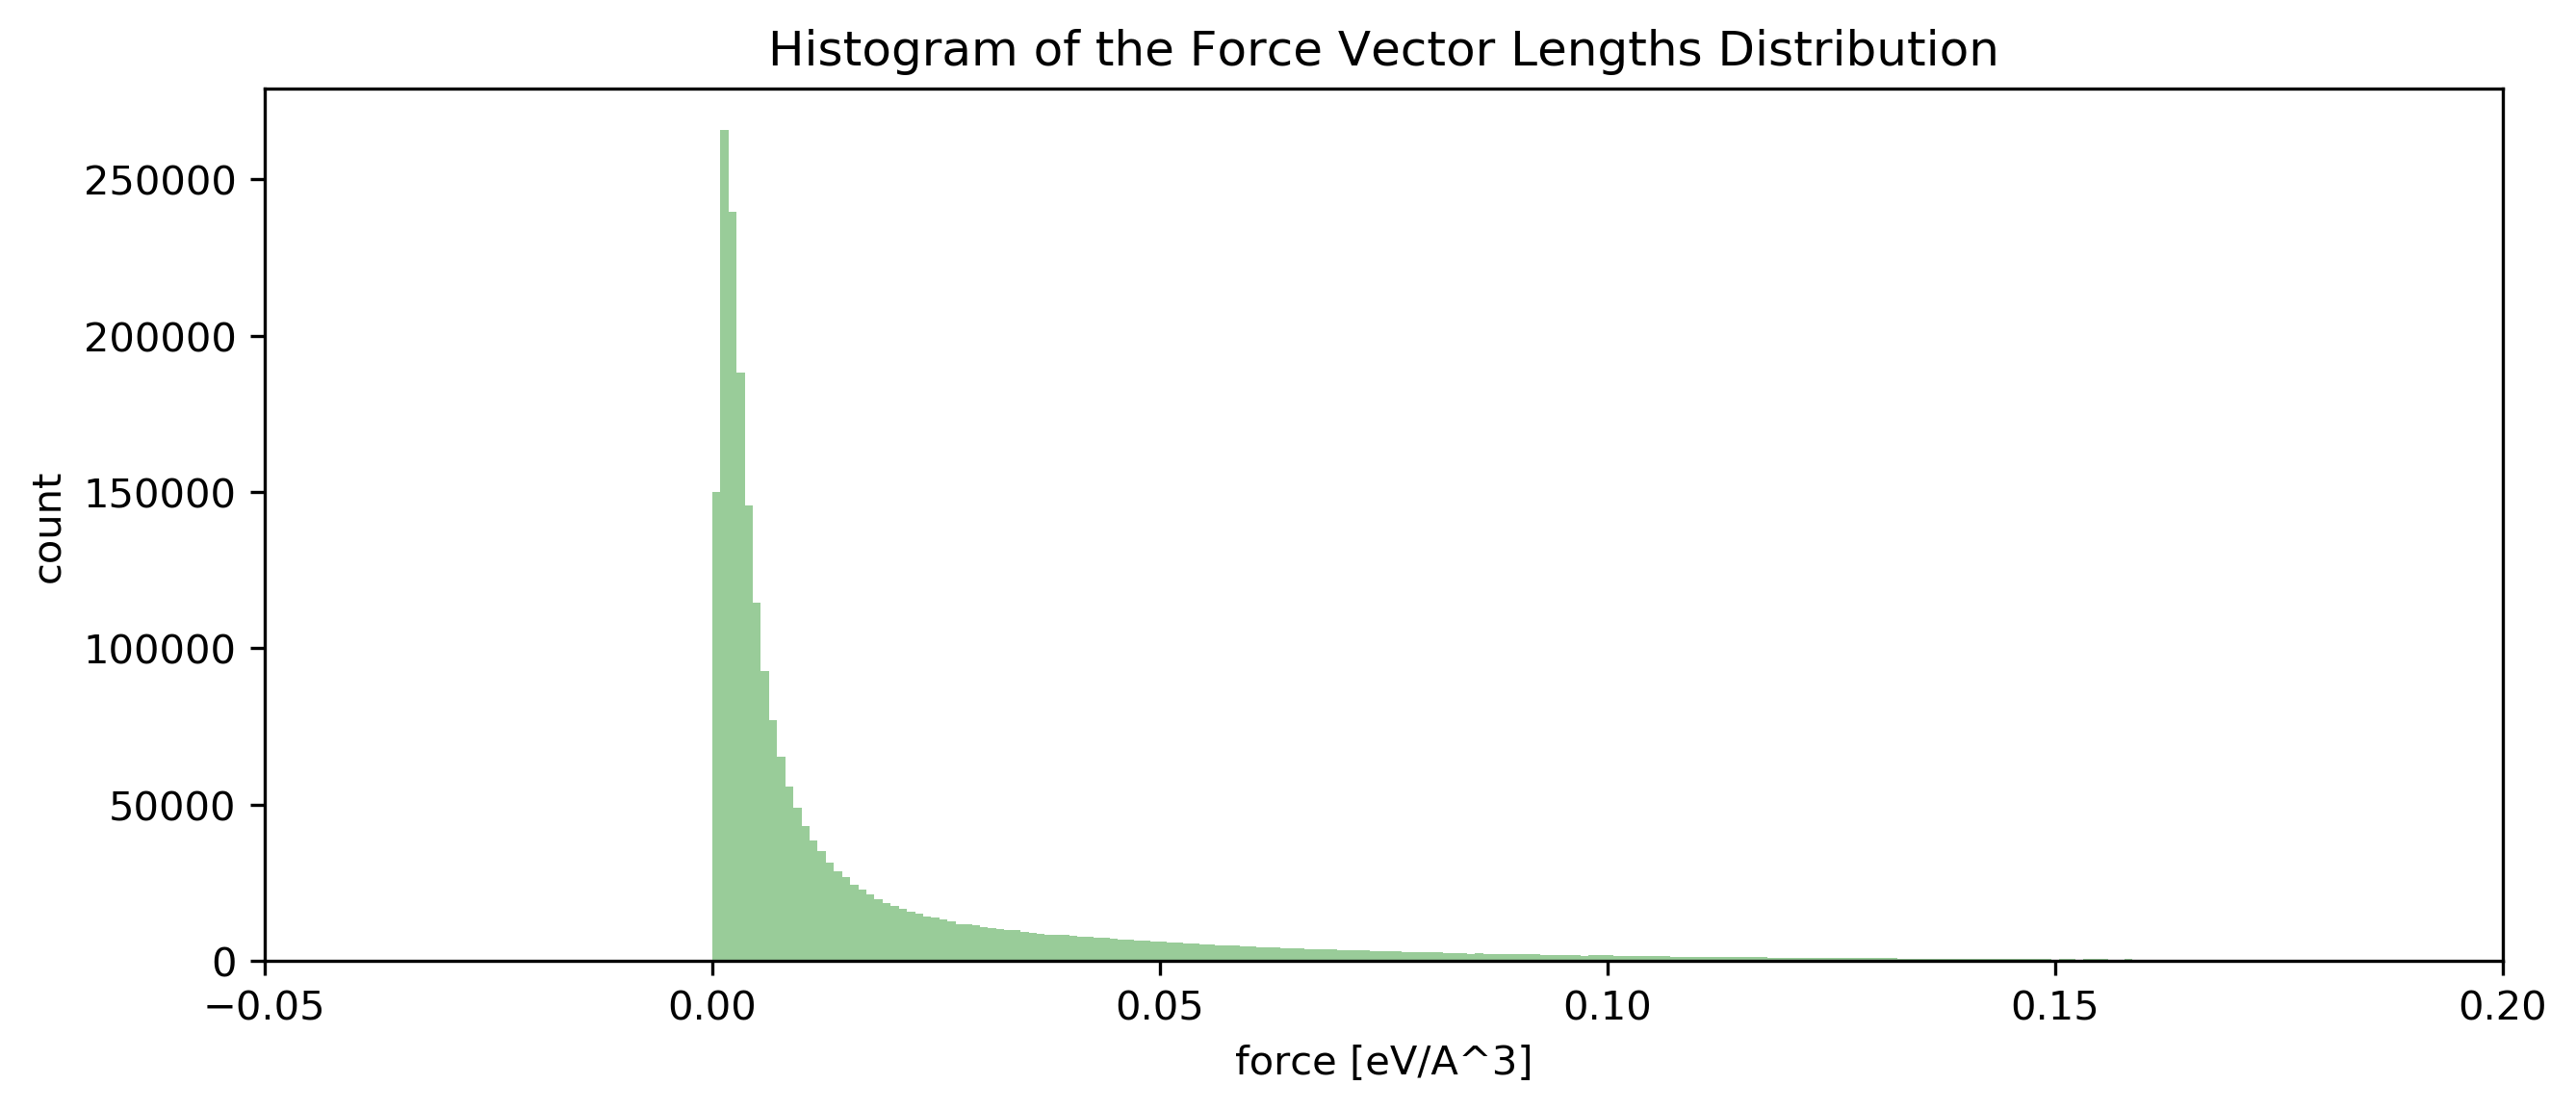

In [346]:
fig = plt.figure(num=None, figsize=(10, 4), dpi=300, facecolor='w', edgecolor='k')
sns.distplot(force_lengths, color="green", norm_hist=False, hist=True, bins=10000, axlabel="force [eV/A^3]", kde=False)
plt.ylabel("count")
plt.title("Histogram of the Force Vector Lengths Distribution")
plt.xlim(-0.05,0.2)

### Check the amount of 2 metal materials. 

In [210]:
# Check the amount of 2 metal materials. 
Al_Ga = set()
Al_In = set()
Ga_In = set()
for ajdi in ajdis:
    rsn = indexing[indexing["id"]==ajdi].relaxation_step_number.values[0]
    material = ngram.init_material(df_frac, df_latt, ajdi, rsn)
    if "Al" not in material.symbol_set:
        Ga_In.add(ajdi)
    if "Ga" not in material.symbol_set:
        Al_In.add(ajdi)
    if "In" not in material.symbol_set:
        Al_Ga.add(ajdi)

In [211]:
print("Amount of materials without In:", len(Al_Ga))
print("Amount of materials without Ga:", len(Al_In))
print("Amount of materials without Al:", len(Ga_In))

Amount of materials without In: 625
Amount of materials without Ga: 326
Amount of materials without Al: 416


### Check the amount of 1 metal materials.

In [212]:
# Check the amount of 1 metal materials. 
Al = set()
Ga = set()
In = set()
for ajdi in ajdis:
    rsn = indexing[indexing["id"]==ajdi].relaxation_step_number.values[0]
    material = ngram.init_material(df_frac, df_latt, ajdi, rsn)
    if ("In" not in material.symbol_set) and ("Ga" not in material.symbol_set):
        Al.add(ajdi)
    if ("Al" not in material.symbol_set) and ("In" not in material.symbol_set):
        Ga.add(ajdi)
    if ("Al" not in material.symbol_set) and ("Ga" not in material.symbol_set):
        In.add(ajdi)

In [213]:
print("Amount of materials with Al only:", len(Al))
print("Amount of materials with Ga only:", len(Ga))
print("Amount of materials with In only:", len(In))

Amount of materials with Al only: 5
Amount of materials with Ga only: 5
Amount of materials with In only: 5


### Robustness of coordination neighborhood during relaxation

In [10]:
def get_hypar(df_frac, df_latt, df_gen, ajdi, rsn):
    """Optimize hyperparametr of ngram based on spacegroup and gamma angle.
    
    Keyword arguments:
    df_frac -- fractional coordinates dataframe
    df_latt -- lattice dataframe
    df_gen -- general data dataframe
    ajdi -- id of the material
    rsn -- relaxation step number of the material
    """
    spacegroup = df_gen["spacegroup"][df_gen["id"]==ajdi].values[0]
    material = ngram.init_material(df_frac, df_latt, ajdi, rsn)
    gamma = material.lattice.gamma
    if spacegroup == 12:
        return 1.4
    elif spacegroup == 33:
        return 1.4
    elif spacegroup == 167:
        return 1.5
    elif spacegroup == 194:
        return 1.3
    elif spacegroup == 206:
        return 1.5
    elif spacegroup == 227:
        if gamma < 60:
            return 1.4
        else:
            return 1.5
    else:
        raise NameError('get_factor does not support the spacegroup: {}'.format(spacegroup))

In [12]:
def changes_in_coordination(df_frac, df_latt, df_gen):
    """Logs the changes in coordinations between (n-1)-th a n-th relaxation step.
    
    Keyword arguments:
    df_frac -- dataframe of fractional coordinates
    df_latt -- dataframe of lattice vectors
    df_gen -- dataframe of general data
    """
    ajdis = df_gen["id"].values
    indexing = df_latt[df_latt.columns[:2]]
    change_list = []
    for ajdi in ajdis:
        change = 0
        for rsn in indexing[indexing["id"]==ajdi].relaxation_step_number.values:
            material = ngram.init_material(df_frac, df_latt, ajdi, rsn)
            hypar = get_hypar(df_frac, df_latt, df_gen, ajdi, rsn)
            G = ngram.gen_graph(material.distance_matrix, material, "metal_oxygen_cons", hypar=hypar)
            if rsn==0:
                other = ngram.get_coordinations(G)
            else:
                another = ngram.get_coordinations(G)
                if not other == another:
                    change += 1
                other = another
        change_list.append(change)
    #print("Number of changes of coordination during relaxation: ", change_list)
    number_of_ids_which_changed = 0
    for i in change_list:
        if not i==0:
            number_of_ids_which_changed += 1
    return change_list, number_of_ids_which_changed

In [13]:
changes_in_coordination(df_frac, df_latt, df_gen)

([0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  3,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  2,
  0,
  0,
  0,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  6,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  4,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  6,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  5,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  4,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  0,
  0,
  0,
  0,


### 356 material ids have changes of coordination between relaxation steps